In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
project_path = '/content/drive/MyDrive/Labelled_Multiclass_Dataset'
os.chdir(project_path)

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Labelled_Multiclass_Dataset/aggregated_data.csv')

In [6]:
data

start_time           end_time_x  total_forward_packets_window  \
0      2024-08-13 08:00:00  2024-08-13 08:00:05                           261   
1      2024-08-13 08:00:56  2024-08-13 08:01:01                            42   
2      2024-08-13 08:00:57  2024-08-13 08:01:02                            42   
3      2024-08-13 08:00:58  2024-08-13 08:01:03                            42   
4      2024-08-13 08:00:59  2024-08-13 08:01:04                            42   
...                    ...                  ...                           ...   
23981  2024-08-26 20:15:56  2024-08-26 20:16:01                             1   
23982  2024-08-26 20:15:57  2024-08-26 20:16:02                             1   
23983  2024-08-26 20:15:58  2024-08-26 20:16:03                             1   
23984  2024-08-26 20:15:59  2024-08-26 20:16:04                             1   
23985  2024-08-26 20:16:00  2024-08-26 20:16:05                             1   

       total_backward_packets_window  total_forward_bytes_window  \
0                                158                       28218   
1                                  9                        6232   
2                                  9                        6232   
3                                  9                        6232   
4                                  9                        6232   
...                              ...                         ...   
23981                              0                         121   
23982                              0                         121   
23983                              0                         121   
23984                              0                         121   
23985                              0                         121   

       total_backward_bytes_window  average_packet_size_fwd_window  \
0                            11769                       64.239935   
1                              671                      134.525210   
2                              671                      134.525210   
3                              671                      134.525210   
4                              671                      134.525210   
...                            ...                             ...   
23981                            0                      121.000000   
23982                            0                      121.000000   
23983                            0                      121.000000   
23984                            0                      121.000000   
23985                            0                      121.000000   

       average_packet_size_bwd_window  flow_duration_window  \
0                           56.293254            1370937322   
1                            8.519608             208424228   
2                            8.519608             208424228   
3                            8.519608             208424228   
4                            8.519608             208424228   
...                               ...                   ...   
23981                        0.000000                     0   
23982                        0.000000                     0   
23983                        0.000000                     0   
23984                        0.000000                     0   
23985                        0.000000                     0   

       packet_count_window  ...  bwd_iat_mean  bwd_iat_max  bwd_iat_min  \
0                      126  ...           0.0            0            0   
1                       17  ...           0.0            0            0   
2                       17  ...           0.0            0            0   
3                       17  ...           0.0            0            0   
4                       17  ...           0.0            0            0   
...                    ...  ...           ...          ...          ...   
23981                    1  ...           0.0            0            0   
23982                    1  

In [7]:
X = data.drop(columns=['BinLabel', 'Label', 'src_ip', 'dst_ip', 'start_time', 'end_time_x', 'end_time_y', 'time_diff', 'time_diff_seconds'])
y = data['BinLabel']  # Your target variable for training

In [8]:
# Check for NaN values in the features
print(X.isna().sum())  # Check how many NaN values are in each feature

total_forward_packets_window      0
total_backward_packets_window     0
total_forward_bytes_window        0
total_backward_bytes_window       0
average_packet_size_fwd_window    0
average_packet_size_bwd_window    0
flow_duration_window              0
packet_count_window               0
mean_iat_fwd_window               0
stddev_iat_fwd_window             0
min_iat_fwd_window                0
max_iat_fwd_window                0
mean_iat_bwd_window               0
stddev_iat_bwd_window             0
min_iat_bwd_window                0
max_iat_bwd_window                0
flow_rate_packets_window          0
flow_rate_bytes_window            0
flow_direction_ratio_window       0
byte_direction_ratio_window       0
src_ip_entropy_window             0
dst_ip_entropy_window             0
src_port                          0
dst_port                          0
protocol                          0
flow_duration                     0
total_forward_packets             0
total_backward_packets      

In [9]:
# Alternatively, check if any NaNs exist
print(X.isna().any().any())  # Returns True if any NaN values exist

False


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [11]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform

In [12]:
# After scaling
print(np.isinf(X_scaled).any())  # Check if scaling caused infinite values

False


In [13]:
# Apply PCA to reduce dimensionality if necessary
pca = PCA(n_components=0.95)  # Keeps 95% of variance
X_pca = pca.fit_transform(X_scaled)

In [14]:
# Random forest classfier for binary

In [15]:
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_pca, y)

RandomForestClassifier(random_state=42)

In [16]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_pca, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9990 (+/- 0.0008)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the Random Forest model on the training set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

In [18]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0]
 [   0  170]]


In [19]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       1.00      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 1.0000


In [20]:
# K-Nearest Neighbor

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

KNeighborsClassifier()

In [22]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X_pca, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9982 (+/- 0.0012)


In [23]:
# Train the Random Forest model on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_pred_knn = knn.predict(X_test)

In [24]:
# Compute confusion matrix for dt
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4627    1]
 [   2  168]]


In [25]:
# Generate classification report
report = classification_report(y_test, y_pred_knn, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       0.99      0.99      0.99       170

    accuracy                           1.00      4798
   macro avg       1.00      0.99      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 0.9998


In [26]:
# Decision tree classifier for binary classification

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_pca, y)

DecisionTreeClassifier(random_state=42)

In [28]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, X_pca, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9981 (+/- 0.0010)


In [29]:
# Train the Decision Tree model on the training set
dt.fit(X_train, y_train)
# Predict on the test set
y_pred1 = dt.predict(X_test)

In [30]:
# Compute confusion matrix for dt
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4627    1]
 [   0  170]]


In [31]:
# Generate classification report
report = classification_report(y_test, y_pred1, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       0.99      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 0.9998


In [32]:
# Support vector for binary classification

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm.fit(X_pca, y)

SVC(C=1, kernel='poly', probability=True, random_state=0)

In [34]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm, X_pca, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9982 (+/- 0.0013)


In [35]:
# Train the SVM model on the training set
svm.fit(X_train, y_train)
# Predict on the test set
y_pred_svm = svm.predict(X_test)

In [36]:
# Compute confusion matrix for dt
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0]
 [   0  170]]


In [37]:
# Generate classification report
report = classification_report(y_test, y_pred_svm, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       1.00      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798

Specificity: 1.0000


In [38]:
# XGBoost for binary classification

In [39]:
from xgboost import XGBClassifier
import xgboost as xgb

In [40]:
# Convert training data to DMatrix with feature names
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=[f"feature_{i}" for i in range(X_train.shape[1])])

In [41]:
#print("XGBoost model features:", xgb_model.feature_names)

In [42]:
X_train.shape

(19188, 16)

In [43]:
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 8,
    'random_state': 42
    }

In [44]:
# Train the model
xgb_model = xgb.train(params, dtrain=dtrain)

In [45]:
# Make predictions (use DMatrix for the test data if available)
dtest = xgb.DMatrix(X_test, feature_names=[f"feature_{i}" for i in range(X_test.shape[1])])  # Use your actual test dataset instead of X for real predictions
y_pred = xgb_model.predict(dtest)

In [46]:
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)


In [47]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred_binary)  # Compare with binary predictions
conf_matrix = confusion_matrix(y_test, y_pred_binary)

In [48]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9987
Confusion Matrix:
 [[4628    0]
 [   6  164]]


In [49]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4628
           1       1.00      0.96      0.98       170

    accuracy                           1.00      4798
   macro avg       1.00      0.98      0.99      4798
weighted avg       1.00      1.00      1.00      4798



In [50]:
# Check the feature names
print("XGBoost model features:", xgb_model.feature_names)

XGBoost model features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']


In [51]:
print("XGBoost model features:", dtrain.feature_names)

XGBoost model features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15']


In [52]:
import joblib
joblib.dump(xgb_model,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/new_xgb_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [53]:
#Define the XGBoost Classifier
xgb1 = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [54]:
# Perform 5-fold cross-validation
#cv_scores = cross_val_score(xgb_model, X_pca, y, cv=5, scoring='accuracy')
# Print cross-validated accuracy
#print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

In [55]:
# Train the model on the training data
xgb1.fit(X_train, y_train)
# Predict on the test set
y_pred_xgb = xgb1.predict(X_test)

In [56]:
# Compute confusion matrix for XGBoost
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0]
 [   0  170]]


In [57]:
# Generate classification report
report = classification_report(y_test, y_pred_xgb, target_names=['Benign', 'Attack'])
print("Classification Report:")
print(report)

# Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
      Attack       1.00      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798



In [58]:
#print("XGBoost model features:", xgb.get_booster().feature_names)

In [59]:
# Feed forward Neural Network for binary classification

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout

feedforward_model_bin = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Dropout layer for regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [61]:
feedforward_model_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = feedforward_model_bin.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9613 - loss: 0.1550 - val_accuracy: 0.9982 - val_loss: 0.0074
Epoch 2/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9984 - loss: 0.0075 - val_accuracy: 0.9990 - val_loss: 0.0065
Epoch 3/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0056 - val_accuracy: 0.9990 - val_loss: 0.0064
Epoch 4/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9990 - val_loss: 0.0049
Epoch 5/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9990 - val_loss: 0.0050
Epoch 6/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9990 - val_loss: 0.0044
Epoch 7/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9990 - val_loss: 0.0025
Epoch 8/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.

In [63]:
loss, accuracy = feedforward_model_bin.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.1697e-05
Test Loss: 8.184312900993973e-05, Test Accuracy: 1.0


In [64]:
y_pred_cnn = (feedforward_model_bin.predict(X_test) > 0.5).astype(int)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [65]:
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0]
 [   0  170]]


In [66]:
print("Classification Report:")
print(classification_report(y_test, y_pred_cnn))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4628
           1       1.00      1.00      1.00       170

    accuracy                           1.00      4798
   macro avg       1.00      1.00      1.00      4798
weighted avg       1.00      1.00      1.00      4798



In [67]:
feedforward_model_bin.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [68]:
import joblib
joblib.dump(rf,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/rf_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [69]:
joblib.dump(dt,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/dt_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [70]:
joblib.dump(svm,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/svm_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(xgb,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/xgb_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(feedforward_model,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/feedforward_model_binary.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(knn,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/knn_model_binary.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/knn_model_binary.pkl']

In [ ]:
# Now, you can save the scaler and pca for later use
import joblib
joblib.dump(scaler,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/scaler_binary.pkl')
joblib.dump(pca,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/pca_binary.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/pca_binary.pkl']

In [ ]:
# Binary classification evaluation

In [ ]:
# Performance Evaluation and Discussion
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


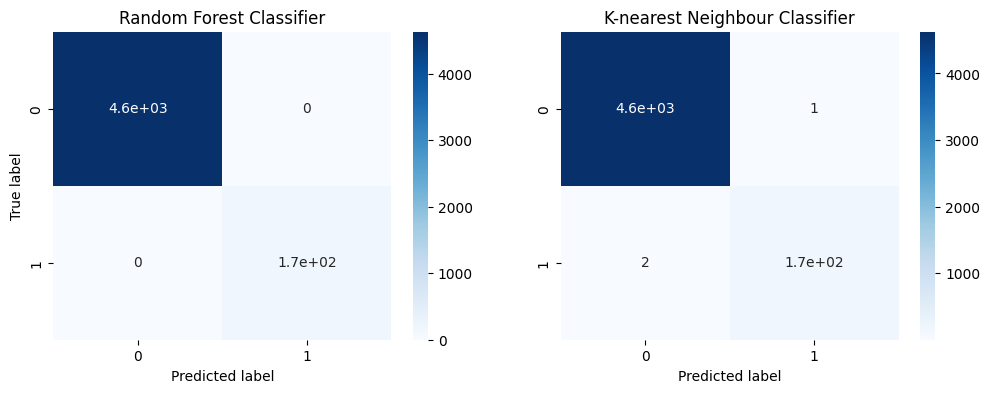

In [ ]:
# Logistic Regression Models Comparison
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)

y_pred_xgb = xgb1.predict(X_test)
y_pred_fnn = (feedforward_model_bin.predict(X_test) > 0.5).astype(int)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_knn)

conf_matrix_model3 = confusion_matrix(y_test, y_pred_dt)
conf_matrix_model4 = confusion_matrix(y_test, y_pred_svm)

conf_matrix_model5 = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_model6 = confusion_matrix(y_test, y_pred_fnn)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Random Forest Classifier')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('K-nearest Neighbour Classifier')


axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

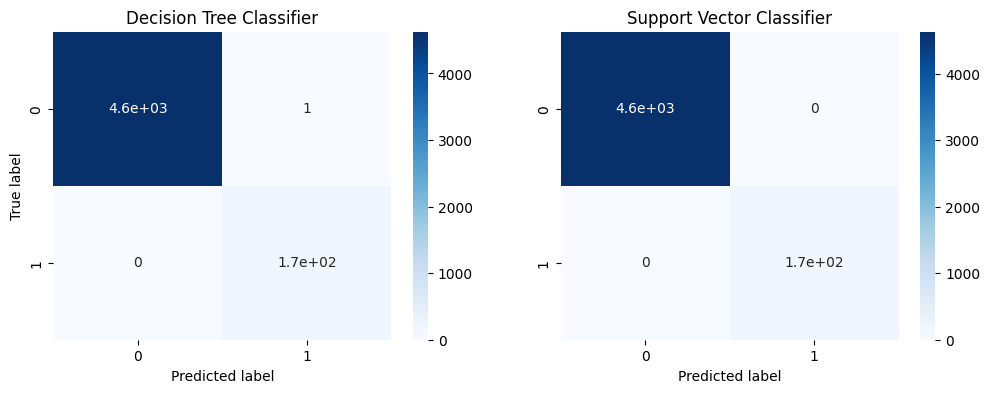

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
sns.heatmap(conf_matrix_model3, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Decision Tree Classifier')

sns.heatmap(conf_matrix_model4, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Support Vector Classifier')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

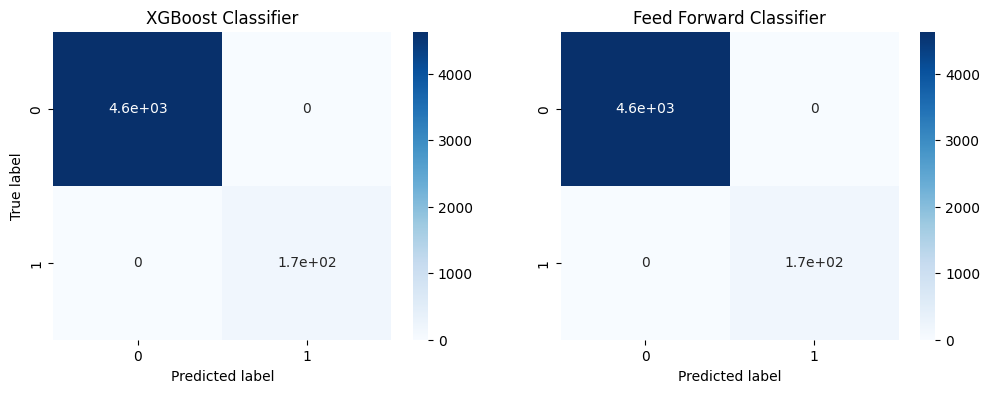

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
sns.heatmap(conf_matrix_model5, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('XGBoost Classifier')

sns.heatmap(conf_matrix_model6, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Feed Forward Classifier')
axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

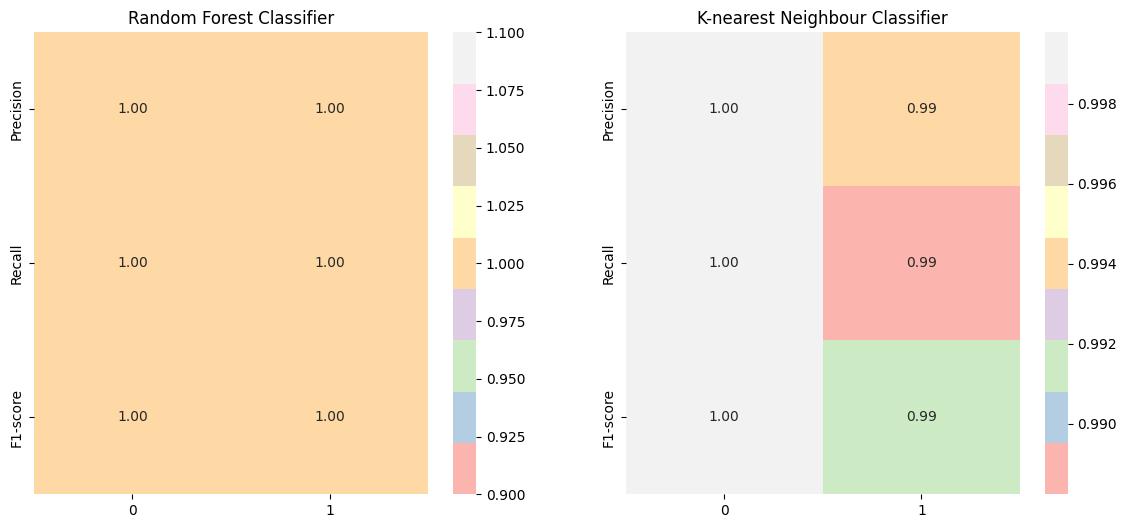

In [ ]:
target_names = rf.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_knn, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Random Forest Classifier')
axs[1].set_title('K-nearest Neighbour Classifier')

plt.show()

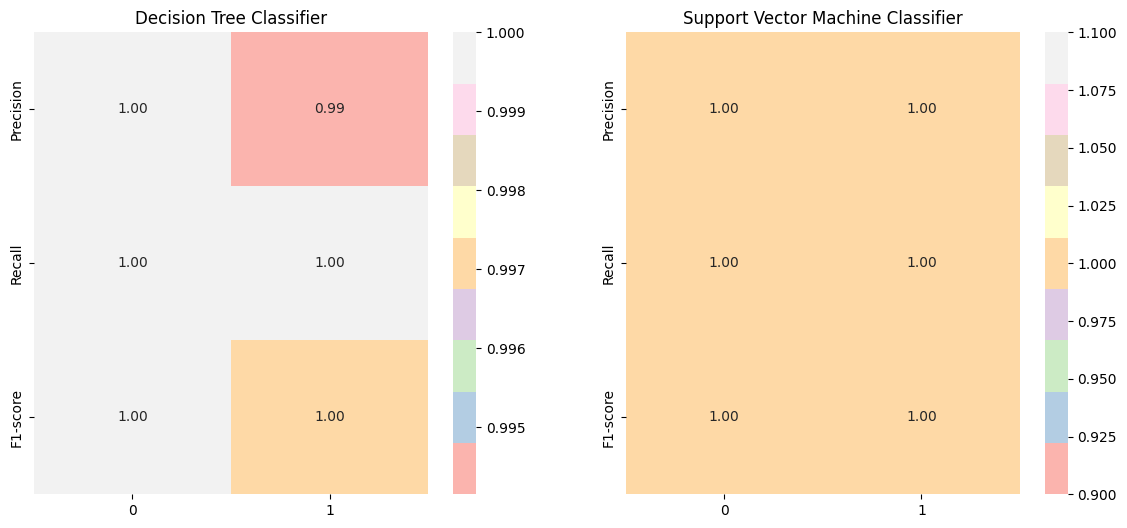

In [ ]:
target_names = rf.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_dt, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_svm, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Decision Tree Classifier')
axs[1].set_title('Support Vector Machine Classifier')

plt.show()

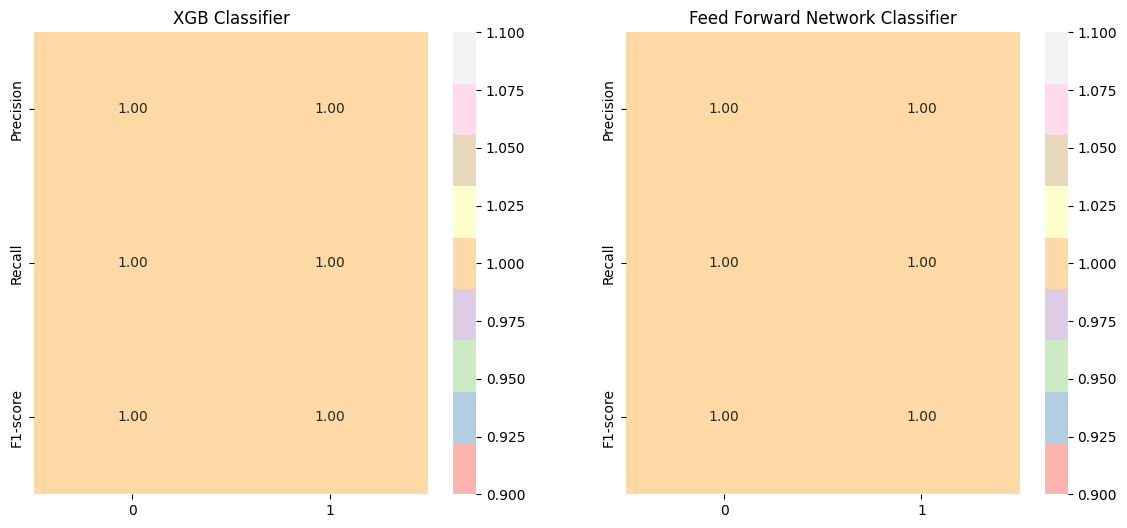

In [ ]:
target_names = rf.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_xgb, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_fnn, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('XGB Classifier')
axs[1].set_title('Feed Forward Network Classifier')

plt.show()

In [ ]:
# bar chart

In [71]:
# Multi-class detection

In [72]:
X1 = data.drop(columns=['Label', 'BinLabel', 'src_ip', 'dst_ip', 'start_time', 'end_time_x', 'end_time_y', 'time_diff', 'time_diff_seconds'])
y1 = data['Label']  # Your target variable for training

In [73]:
# Alternatively, check if any NaNs exist
print(X1.isna().any().any())  # Returns True if any NaN values exist

False


In [74]:
# Scale the data
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)  # Fit and transform

In [75]:
# After scaling
print(np.isinf(X1_scaled).any())  # Check if scaling caused infinite values

False


In [76]:
# Apply PCA to reduce dimensionality if necessary
pca1 = PCA(n_components=0.95)  # Keeps 95% of variance
X1_pca = pca1.fit_transform(X1_scaled)

In [77]:
# Random Forest Classifier Model for multi classification

In [123]:
from sklearn.ensemble import RandomForestClassifier


# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X1_pca, y1)

RandomForestClassifier(random_state=42)

In [124]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X1_pca, y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9912 (+/- 0.0015)


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and test sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X1_pca, y1, test_size=0.2, random_state=42)

# Train the Random Forest model on the training set
rf.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_rf = rf.predict(X_test_multi)

In [126]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0    0    0    0]
 [   0   29    3    0    0]
 [   0    1   51    0    0]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]


In [127]:
# Generate classification report
report = classification_report(y_test_multi, y_pred_rf, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
print("Random Forest Classifier")

print(report)

#Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

Random Forest Classifier
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.97      0.91      0.94        32
   TCPAttack       0.94      0.98      0.96        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       1.00      1.00      1.00        27

    accuracy                           1.00      4798
   macro avg       0.98      0.98      0.98      4798
weighted avg       1.00      1.00      1.00      4798



In [25]:
print("Data type of y1:", y1.dtype)

Data type of y1: object


In [26]:
# Check unique values in y1 to verify that they are integers
print("Unique values in y1:", y1.unique())

Unique values in y1: ['XMasAttack' 'Benign' 'TCPAttack' 'UDPAttack' 'HTTPAttack']


In [83]:
# Knn of binary classification

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn_multi = KNeighborsClassifier(n_neighbors = 4)
knn_multi.fit(X1_pca, y1)

KNeighborsClassifier(n_neighbors=4)

In [129]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_multi, X1_pca, y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9890 (+/- 0.0028)


In [130]:
# Train the Random Forest model on the training set
knn_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_knn_multi = knn_multi.predict(X_test_multi)

In [131]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred_knn_multi)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0    0    0    0]
 [   1   30    1    0    0]
 [   0    6   46    0    0]
 [   0    0    0   59    0]
 [   1    0    0    0   26]]


In [132]:
# Generate classification report
report = classification_report(y_test_multi, y_pred_knn_multi, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
print("KNN Classifier")
print(report)

#Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

KNN Classifier
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.83      0.94      0.88        32
   TCPAttack       0.98      0.88      0.93        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       1.00      0.96      0.98        27

    accuracy                           1.00      4798
   macro avg       0.96      0.96      0.96      4798
weighted avg       1.00      1.00      1.00      4798



In [89]:
import numpy as np

# Check the unique classes and ensure they align with target_names
print("Unique classes in y_test_multi:", np.unique(y_test_multi))
print("Unique classes in y_pred_knn_multi:", np.unique(y_pred_knn_multi))

Unique classes in y_test_multi: ['Benign' 'HTTPAttack' 'TCPAttack' 'UDPAttack' 'XMasAttack']
Unique classes in y_pred_knn_multi: ['Benign' 'HTTPAttack' 'TCPAttack' 'UDPAttack' 'XMasAttack']


In [34]:
# decision tree for multi classification

In [90]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_multi = DecisionTreeClassifier(max_depth = 54)
dt_multi.fit(X1_pca, y1)

DecisionTreeClassifier(max_depth=54)

In [91]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_multi, X1_pca, y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9874 (+/- 0.0044)


In [92]:
# Train the Random Forest model on the training set
dt_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_dt = dt_multi.predict(X_test_multi)

In [93]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0    0    0    0]
 [   0   28    4    0    0]
 [   0    1   50    0    1]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]


In [94]:
# Generate classification report
report = classification_report(y_test_multi, y_pred_dt, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
print("Decision Tree Classifier")
print(report)

# Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

Decision Tree Classifier
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.97      0.88      0.92        32
   TCPAttack       0.93      0.96      0.94        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       0.96      1.00      0.98        27

    accuracy                           1.00      4798
   macro avg       0.97      0.97      0.97      4798
weighted avg       1.00      1.00      1.00      4798



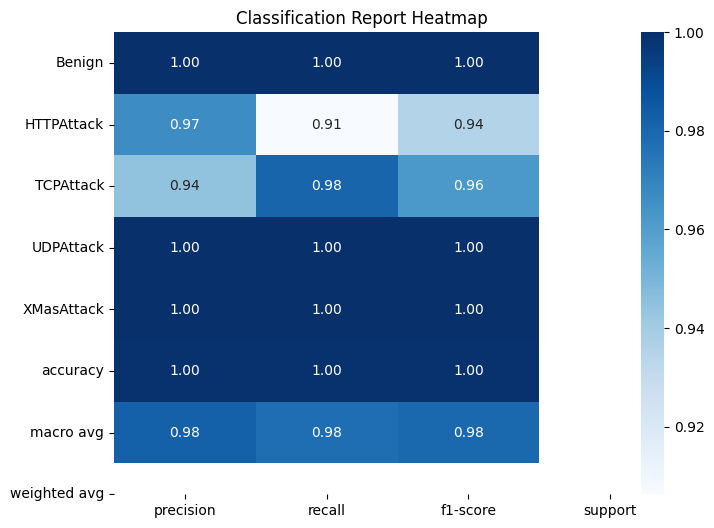

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test_multi, y_pred_rf, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'], output_dict=True)

# Convert the classification report into a pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report using sns.heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1].astype(float), annot=True, cmap="Blues", fmt=".2f", cbar=True,
            xticklabels=report_df.columns, yticklabels=report_df.index)
plt.title('Classification Report Heatmap')
plt.show()

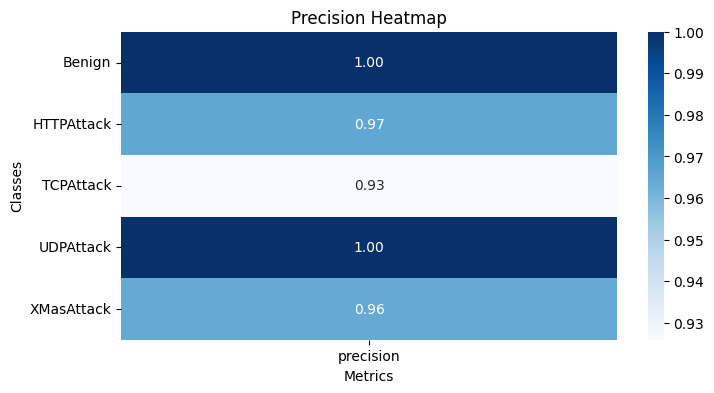

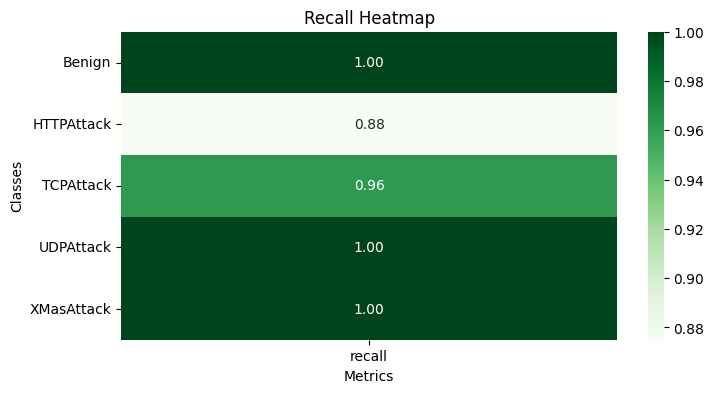

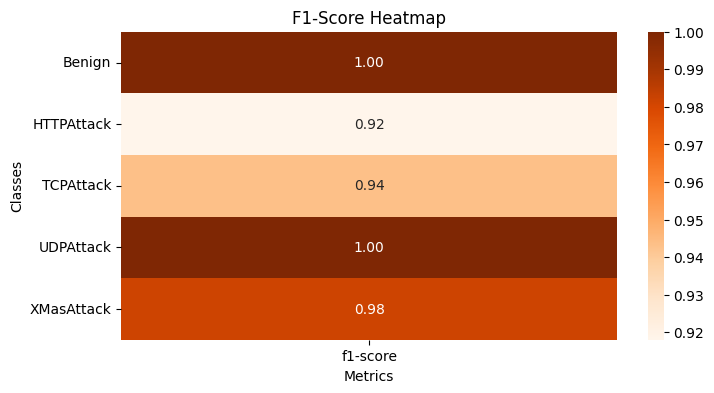

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report as a dictionary
report_dict = classification_report(
    y_test_multi,
    y_pred_dt,
    target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'],
    output_dict=True
)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Filter rows corresponding to classes
class_metrics = report_df.loc[['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack']]

# Plot precision heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(class_metrics[['precision']], annot=True, cmap='Blues', fmt=".2f")
plt.title("Precision Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Plot recall heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(class_metrics[['recall']], annot=True, cmap='Greens', fmt=".2f")
plt.title("Recall Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Plot F1-score heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(class_metrics[['f1-score']], annot=True, cmap='Oranges', fmt=".2f")
plt.title("F1-Score Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

In [95]:
# SVM for multi classification

In [96]:
from sklearn.svm import SVC
#from sklearn.multiclass import OneVsRestClassifier
svm_multi = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm_multi.fit(X1_pca, y1)

SVC(C=1, gamma=0.1, probability=True, random_state=0)

In [97]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_multi, X1_pca, y1, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the accuracy across the folds
print(f"Cross-validated accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-validated accuracy: 0.9913 (+/- 0.0019)


In [98]:
# Train the SVM model on the training set
svm_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_svm_multi = svm_multi.predict(X_test_multi)

In [99]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred_svm_multi)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4628    0    0    0    0]
 [   0   16   16    0    0]
 [   1    3   48    0    0]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]


In [100]:
# Generate classification report
report = classification_report(y_test_multi, y_pred_svm_multi, target_names=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
print("SVM Classifier")
print(report)

# Specificity calculation
#tn, fp, fn, tp = conf_matrix.ravel()
#specificity = tn / (tn + fp)
#print(f"Specificity: {specificity:.4f}")

SVM Classifier
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.84      0.50      0.63        32
   TCPAttack       0.75      0.92      0.83        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       1.00      1.00      1.00        27

    accuracy                           1.00      4798
   macro avg       0.92      0.88      0.89      4798
weighted avg       1.00      1.00      1.00      4798



In [101]:
# XGBoost for multi classification

In [102]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Encode labels to numeric values
label_encoder = LabelEncoder()
y1_encoded = label_encoder.fit_transform(y1)

# Split the data into training and test sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X1_pca, y1_encoded, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Classifier without `use_label_encoder`
xgb_multi = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss', random_state=42)
xgb_multi.fit(X_train_multi, y_train_multi)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [103]:
# Perform 5-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_multi, X1_pca, y1_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std():.4f})")

Cross-validated accuracy: 0.9915 (+/- 0.0007)


In [ ]:
> 0.5).astype(int)

In [104]:
# Predict on the test set
y_pred_xgb = xgb_multi.predict(X_test_multi)

In [105]:
# Decode the predictions and true labels back to original label names for reporting
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)
y_test_labels = label_encoder.inverse_transform(y_test_multi)

In [106]:
# Compute confusion matrix and classification report
conf_matrix_xgb = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
report_xgb = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)

In [107]:
print("XGBoost Classifier")
print(report_xgb)

XGBoost Classifier
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       1.00      0.91      0.95        32
   TCPAttack       0.94      0.98      0.96        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       0.96      1.00      0.98        27

    accuracy                           1.00      4798
   macro avg       0.98      0.98      0.98      4798
weighted avg       1.00      1.00      1.00      4798



In [67]:
print("Confusion Matrix for XGBoost:")
print(conf_matrix_xgb)

Confusion Matrix for XGBoost:
[[4628    0    0    0    0]
 [   0   29    3    0    0]
 [   0    0   51    0    1]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]


In [108]:
# feed forward for Multi classification

In [109]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Convert y1 from object to integer labels
label_encoder = LabelEncoder()
y1_encoded = label_encoder.fit_transform(y1)

# Convert integer labels to one-hot encoded format for multi-class classification
y1_categorical = to_categorical(y1_encoded)

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
# Split the data into training and test sets (80% train, 20% test)
X_train_multi_nn, X_test_multi_nn, y_train_multi_nn, y_test_multi_nn = train_test_split(X1_pca, y1_categorical, test_size=0.2, random_state=42)

In [111]:
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
feedforward_model = Sequential([
    Input(shape=(X_train_multi_nn.shape[1],)),  # Specify the input shape here
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y1_categorical.shape[1], activation='softmax')  # Number of classes in the output layer
])

In [112]:
feedforward_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
feedforward_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,757 (42.02 KB)

 Trainable params: 10,757 (42.02 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
history = feedforward_model.fit(X_train_multi_nn, y_train_multi_nn, epochs=20, batch_size=32, validation_data=(X_test_multi_nn, y_test_multi_nn))

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9393 - loss: 0.2266 - val_accuracy: 0.9925 - val_loss: 0.0176
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9890 - loss: 0.0227 - val_accuracy: 0.9929 - val_loss: 0.0138
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9908 - loss: 0.0180 - val_accuracy: 0.9933 - val_loss: 0.0125
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9927 - loss: 0.0159 - val_accuracy: 0.9937 - val_loss: 0.0125
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9917 - loss: 0.0146 - val_accuracy: 0.9933 - val_loss: 0.0120
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9916 - loss: 0.0149 - val_accuracy: 0.9921 - val_loss: 0.0123
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9931 - loss: 0.0129 - val_accuracy: 0.9896 - val_loss: 0.0125
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9925 - loss: 0.0132 - val_accuracy: 0.

In [115]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [116]:
y_pred_proba = feedforward_model.predict(X_test_multi_nn)  # Probability predictions for each class
y_pred_ff = np.argmax(y_pred_proba, axis=1)  # Convert to class labels

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [117]:
y_test_ff = np.argmax(y_test_multi_nn, axis=1)

In [118]:
conf_matrix = confusion_matrix(y_test_ff, y_pred_ff)

In [119]:
target_names = ['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack']  # Customize based on your classes
report = classification_report(y_test_ff, y_pred_ff, target_names=target_names)

In [121]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nFeed Forward Classifier")
print(report)

Confusion Matrix:
[[4628    0    0    0    0]
 [   1    1   30    0    0]
 [   0    3   49    0    0]
 [   0    0    0   59    0]
 [   0    0    0    0   27]]

Feed Forward Classifier
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       0.25      0.03      0.06        32
   TCPAttack       0.62      0.94      0.75        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       1.00      1.00      1.00        27

    accuracy                           0.99      4798
   macro avg       0.77      0.79      0.76      4798
weighted avg       0.99      0.99      0.99      4798



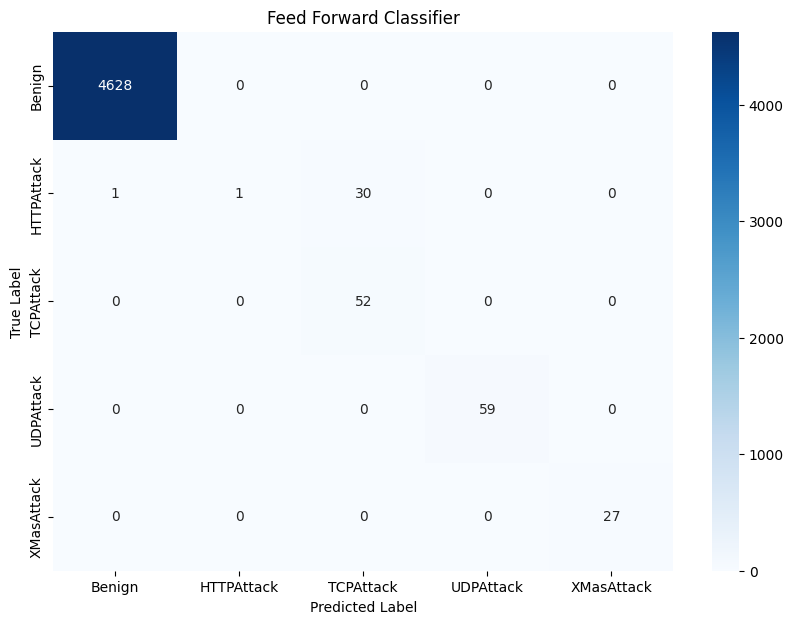

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix using sns.heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Feed Forward Classifier")
plt.show()

In [81]:
# multi classification evaluation

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_multi = label_encoder.fit_transform(y_test_multi)  # Convert to numeric

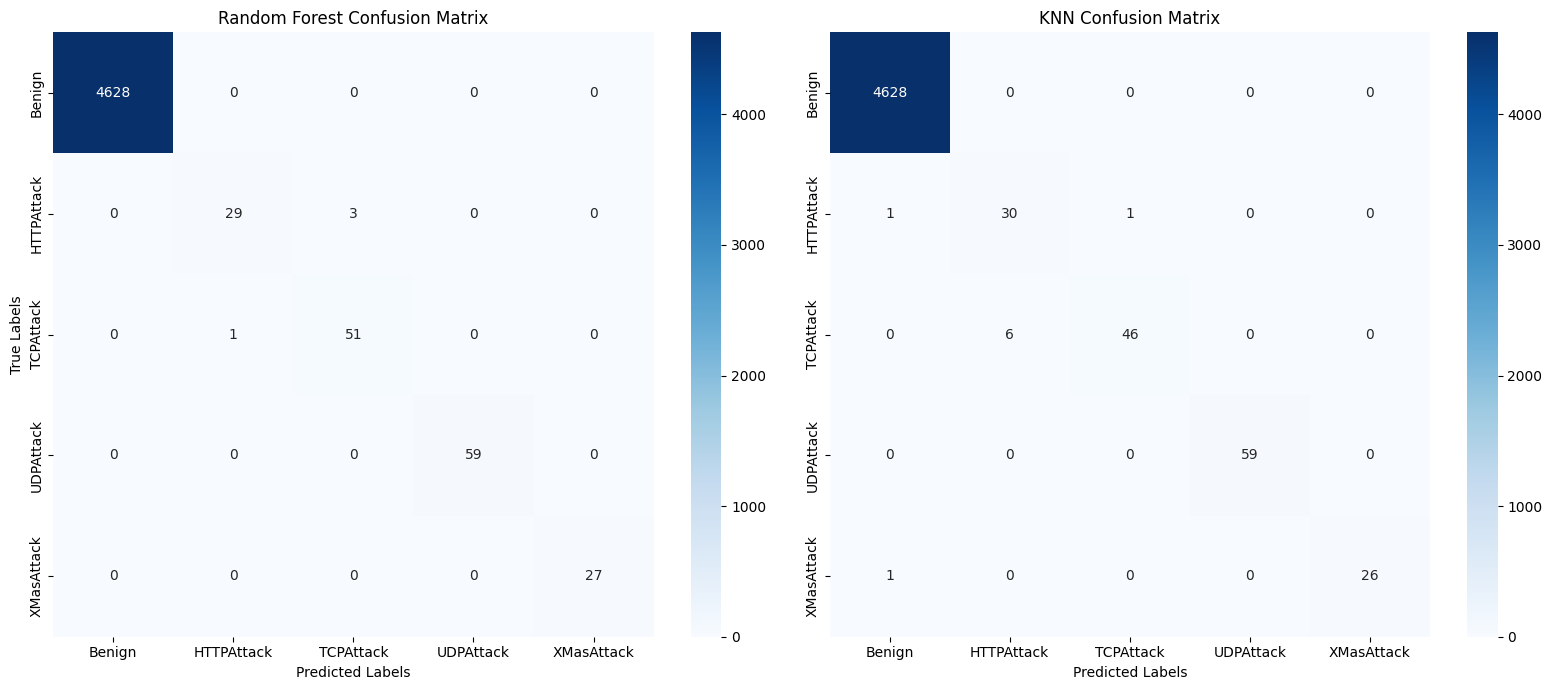

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test Split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X1_pca, y1, test_size=0.2, random_state=42)

# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_multi, y_train_multi)
y_pred_rf = rf.predict(X_test_multi)
conf_matrix_rf = confusion_matrix(y_test_multi, y_pred_rf)

# K-Nearest Neighbors Model
knn_multi = KNeighborsClassifier(n_neighbors=4)
knn_multi.fit(X_train_multi, y_train_multi)
y_pred_knn = knn_multi.predict(X_test_multi)
conf_matrix_knn = confusion_matrix(y_test_multi, y_pred_knn)

# Plotting Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Random Forest Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', ax=axs[0],
            xticklabels=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'],
            yticklabels=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
axs[0].set_title('Random Forest Confusion Matrix')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# K-Nearest Neighbors Confusion Matrix
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='g', ax=axs[1],
            xticklabels=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'],
            yticklabels=['Benign', 'HTTPAttack', 'TCPAttack', 'UDPAttack', 'XMasAttack'])
axs[1].set_title('KNN Confusion Matrix')
axs[1].set_xlabel('Predicted Labels')

# Show plot
plt.tight_layout()
plt.show()

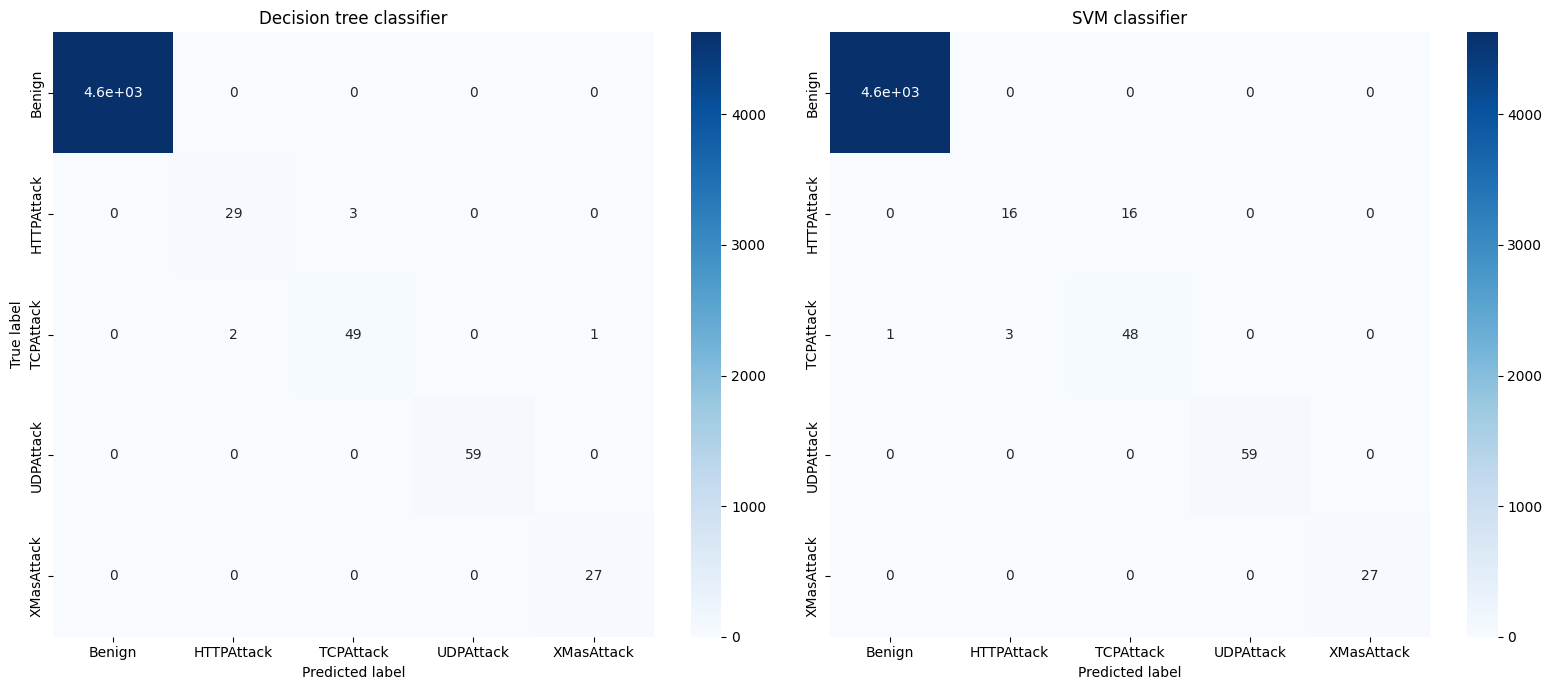

In [82]:
# Random Forest Models Comparison
y_pred_dt = dt_multi.predict(X_test_multi)
y_pred_svm = svm_multi.predict(X_test_multi)

conf_matrix_model1 = confusion_matrix(y_test_multi, y_pred_dt)
conf_matrix_model2 = confusion_matrix(y_test_multi, y_pred_svm)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf.classes_, yticklabels = rf.classes_)
axs[0].set_title('Decision tree classifier')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = knn_multi.classes_, yticklabels = knn_multi.classes_)
axs[1].set_title('SVM classifier')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

Classification Report for XGBoost:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4628
  HTTPAttack       1.00      0.91      0.95        32
   TCPAttack       0.94      0.98      0.96        52
   UDPAttack       1.00      1.00      1.00        59
  XMasAttack       0.96      1.00      0.98        27

    accuracy                           1.00      4798
   macro avg       0.98      0.98      0.98      4798
weighted avg       1.00      1.00      1.00      4798



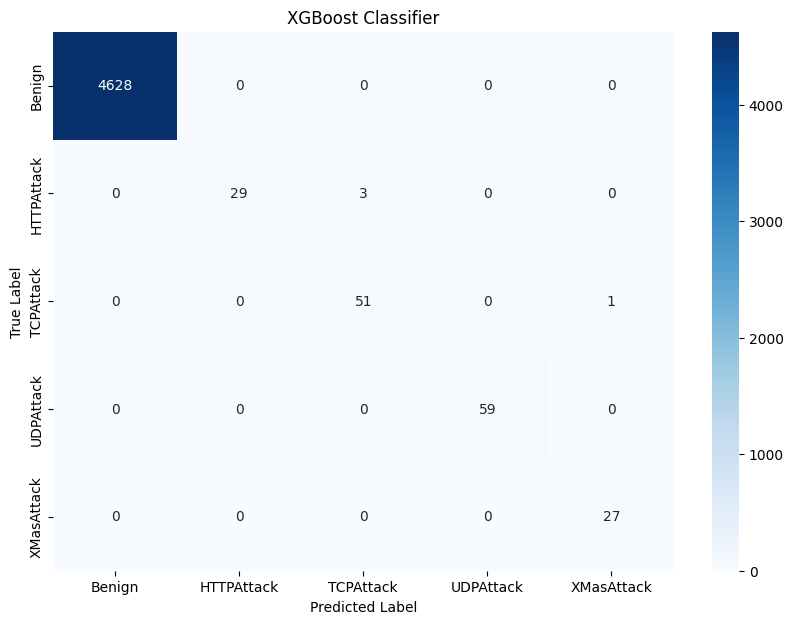

In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode labels with all unique classes in `y1` to ensure consistency
label_encoder = LabelEncoder()
y1_encoded = label_encoder.fit_transform(y1)  # Fit encoder on full label set

# Step 2: Split data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X1_pca, y1_encoded, test_size=0.2, random_state=42
)

# Step 3: Train XGBoost model and make predictions
xgb_multi = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss', random_state=42)
xgb_multi.fit(X_train_multi, y_train_multi)

# Predict on the test set
y_pred_xgb = xgb_multi.predict(X_test_multi)

# Step 4: Compute the confusion matrix and classification report with the original label names
y_test_labels = label_encoder.inverse_transform(y_test_multi)
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

conf_matrix_xgb = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
report_xgb = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)

print("Classification Report for XGBoost:")
print(report_xgb)

# Step 5: Plot the confusion matrix using sns.heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Classifier")
plt.show()

In [ ]:
import joblib
joblib.dump(rf,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/random_forest_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(knn_multi,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/knearest_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
joblib.dump(dt_multi,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/decision_tree_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
joblib.dump(svm_multi,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/svm_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(xgb_multi,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/xgboost_multi.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
import joblib
joblib.dump(feedforward_model,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/fedforward_multi.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/fedforward_multi.pkl']

In [ ]:
# Now, you can save the scaler and pca for later use
import joblib
joblib.dump(scaler1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/scaler_multi.pkl')
joblib.dump(pca1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/pca_multi.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/pca_multi.pkl']

In [ ]:
import joblib
joblib.dump(scaler1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/scaler_multi.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/scaler_multi.pkl']

In [ ]:
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
drop_columns = [
    "id"
   ]
data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce', format='%d-%m-%Y %H:%M')

In [ ]:
# Ensure the index is of datetime type
if not pd.api.types.is_datetime64_any_dtype(data.index):
    data['time'] = pd.to_datetime(data['timestamp'])
    data.set_index('time', inplace=True)

In [ ]:
# Check if the index is sorted
is_sorted = data.index.is_monotonic_increasing
print(f"Is the Timestamp index sorted? {is_sorted}")

Is the Timestamp index sorted? False


In [ ]:
# If the index is not sorted, sort it
if not is_sorted:
    data.sort_index(inplace=True)
    print("Timestamp index was not sorted. It has now been sorted.")

Timestamp index was not sorted. It has now been sorted.


In [ ]:
# Check if the index is sorted
is_sorted = data.index.is_monotonic_increasing
print(f"Is the Timestamp index sorted? {is_sorted}")

Is the Timestamp index sorted? True


In [ ]:
# Identifying missing values
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Series([], dtype: int64)


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Series([], dtype: int64)


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 0
Missing values after processing infinite values: 0


In [ ]:
# Define window size  and step size
window_size = pd.Timedelta('5s')  # 5-second window size
step_size = pd.Timedelta('1s')   # 1-second sliding step

In [ ]:
# Ensure 'timestamp' is included in the dataset
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce', format='%d-%m-%Y %H:%M')

# Aggregate session-based features and add timestamp information
session_data = data.groupby(['src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol']).agg(
    # Session-based aggregations
    flow_duration=('flow_duration', 'sum'),
    total_forward_packets=('tot_fwd_pkts', 'sum'),
    total_backward_packets=('tot_bwd_pkts', 'sum'),
    total_bytes_forward=('totlen_fwd_pkts', 'sum'),
    total_bytes_backward=('totlen_bwd_pkts', 'sum'),
    mean_packet_length_forward=('fwd_pkt_len_mean', 'mean'),
    mean_packet_length_backward=('bwd_pkt_len_mean', 'mean'),
    packet_size_mean=('pkt_len_mean', 'mean'),
    flow_iat_mean=('flow_iat_mean', 'mean'),
    down_up_ratio=('down_up_ratio', 'mean'),
    subflow_fwd_pkts=('subflow_fwd_pkts', 'sum'),
    subflow_bwd_pkts=('subflow_bwd_pkts', 'sum'),
    subflow_fwd_byts=('subflow_fwd_byts', 'sum'),
    subflow_bwd_byts=('subflow_bwd_byts', 'sum'),

    # Direction-specific aggregations (Forward flows)
    fwd_pkt_len_mean=('fwd_pkt_len_mean', 'mean'),
    fwd_pkt_len_max=('fwd_pkt_len_max', 'max'),
    fwd_pkt_len_min=('fwd_pkt_len_min', 'min'),
    fwd_pkt_len_std=('fwd_pkt_len_std', 'std'),
    fwd_iat_mean=('fwd_iat_mean', 'mean'),
    fwd_iat_max=('fwd_iat_max', 'max'),
    fwd_iat_min=('fwd_iat_min', 'min'),
    fwd_iat_tot=('fwd_iat_tot', 'sum'),
    fwd_blk_rate_avg=('fwd_blk_rate_avg', 'mean'),

    # Direction-specific aggregations (Backward flows)
    bwd_pkt_len_mean=('bwd_pkt_len_mean', 'mean'),
    bwd_pkt_len_max=('bwd_pkt_len_max', 'max'),
    bwd_pkt_len_min=('bwd_pkt_len_min', 'min'),
    bwd_pkt_len_std=('bwd_pkt_len_std', 'std'),
    bwd_iat_mean=('bwd_iat_mean', 'mean'),
    bwd_iat_max=('bwd_iat_max', 'max'),
    bwd_iat_min=('bwd_iat_min', 'min'),
    bwd_iat_tot=('bwd_iat_tot', 'sum'),
    bwd_blk_rate_avg=('bwd_blk_rate_avg', 'mean'),

    # Timestamp info: min and max timestamp per session
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max')
)

# calculate total packets and total bytes after the aggregation
session_data['total_packets'] = session_data['total_forward_packets'] + session_data['total_backward_packets']
session_data['total_bytes'] = session_data['total_bytes_forward'] + session_data['total_bytes_backward']

session_data = session_data.reset_index()

In [ ]:
session_data.head()

src_ip           dst_ip  src_port  dst_port  protocol  \
0        0.0.0.0  255.255.255.255        68        67        17   
1  13.107.246.41    192.168.1.192       443     50272         6   
2   13.107.42.18    192.168.1.192       443     33066         6   
3   13.107.42.18    192.168.1.192       443     36978         6   
4   13.107.42.18    192.168.1.192       443     45660         6   

   flow_duration  total_forward_packets  total_backward_packets  \
0      711407852                     89                       0   
1          10256                      4                       3   
2              0                      1                       0   
3              0                      1                       0   
4              0                      1                       0   

   total_bytes_forward  total_bytes_backward  ...  bwd_pkt_len_std  \
0                30236                     0  ...              0.0   
1                  303                   210  ...              NaN   
2                   54                     0  ...              NaN   
3                   54                     0  ...              NaN   
4                   54                     0  ...              NaN   

   bwd_iat_mean  bwd_iat_max  bwd_iat_min  bwd_iat_tot  bwd_blk_rate_avg  \
0           0.0            0            0            0               0.0   
1        2448.5         3921          976         4897               0.0   
2           0.0            0            0            0               0.0   
3           0.0            0            0            0               0.0   
4           0.0            0            0            0               0.0   

           start_time            end_time  total_packets  total_bytes  
0 2024-08-13 08:01:00 2024-08-26 12:34:00             89        30236  
1 2024-08-13 08:00:00 2024-08-13 08:00:00              7          513  
2 2024-08-16 08:05:00 2024-08-16 08:05:00              1           54  
3 2024-08-15 07:02:00 2024-08-15 07:02:00              1           54  
4 2024-08-14 08:32:00 2024-08-14 08:32:00              1           54  

[5 rows x 41 columns]

In [ ]:
import scipy.stats

# entropy calculation
def entropy(column):
    counts = column.value_counts(normalize=True)
    return scipy.stats.entropy(counts)

# Time-Based Sliding Window Aggregation
def sliding_window_aggregation(data, window_size, step_size):
    window_aggregates = []

    # Generate the start times using pd.date_range
    start_times = pd.date_range(start=data.index.min(), end=data.index.max(), freq=step_size)

    # Iterate over each time window
    for start_time in start_times:
        end_time = start_time + window_size
        window = data[(data.index >= start_time) & (data.index < end_time)]

        if len(window) == 0:
            continue

        window.loc[:, 'timestamp'] = pd.to_datetime(window['timestamp'])

        # Flow rate features
        duration = (window['timestamp'].max() - window['timestamp'].min()).total_seconds() + 1e-9
        flow_rate_features = {
            'flow_rate_packets_window': len(window) / duration,
            'flow_rate_bytes_window': window['totlen_fwd_pkts'].sum() / duration,
        }

        # Directional ratio features
        directional_features = {
            'flow_direction_ratio_window': window['tot_fwd_pkts'].sum() / (window['tot_bwd_pkts'].sum() + 1),
            'byte_direction_ratio_window': window['totlen_fwd_pkts'].sum() / (window['totlen_bwd_pkts'].sum() + 1),
        }

        # Entropy-based features
        entropy_features = {
            'src_ip_entropy_window': entropy(window['src_ip']),
            'dst_ip_entropy_window': entropy(window['dst_ip']),
        }

        aggregated = {
            'start_time': start_time,
            'end_time': end_time,
            'total_forward_packets_window': window['tot_fwd_pkts'].sum(),
            'total_backward_packets_window': window['tot_bwd_pkts'].sum(),
            'total_forward_bytes_window': window['totlen_fwd_pkts'].sum(),
            'total_backward_bytes_window': window['totlen_bwd_pkts'].sum(),
            'average_packet_size_fwd_window': window['fwd_pkt_len_mean'].mean(),
            'average_packet_size_bwd_window': window['bwd_pkt_len_mean'].mean(),
            'flow_duration_window': window['flow_duration'].sum(),
            'packet_count_window': len(window),
            'mean_iat_fwd_window': window['fwd_iat_mean'].mean(),
            'stddev_iat_fwd_window': window['fwd_iat_std'].mean(),
            'min_iat_fwd_window': window['fwd_iat_min'].min(),
            'max_iat_fwd_window': window['fwd_iat_max'].max(),
            'mean_iat_bwd_window': window['bwd_iat_mean'].mean(),
            'stddev_iat_bwd_window': window['bwd_iat_std'].mean(),
            'min_iat_bwd_window': window['bwd_iat_min'].min(),
            'max_iat_bwd_window': window['bwd_iat_max'].max(),
            **flow_rate_features,
            **directional_features,
            **entropy_features
        }

        window_aggregates.append(aggregated)

    return pd.DataFrame(window_aggregates)

In [ ]:
# Apply sliding window aggregation
sliding_windows_data = sliding_window_aggregation(data, window_size, step_size)

In [ ]:
sliding_windows_data.columns

Index(['start_time', 'end_time', 'total_forward_packets_window',
       'total_backward_packets_window', 'total_forward_bytes_window',
       'total_backward_bytes_window', 'average_packet_size_fwd_window',
       'average_packet_size_bwd_window', 'flow_duration_window',
       'packet_count_window', 'mean_iat_fwd_window', 'stddev_iat_fwd_window',
       'min_iat_fwd_window', 'max_iat_fwd_window', 'mean_iat_bwd_window',
       'stddev_iat_bwd_window', 'min_iat_bwd_window', 'max_iat_bwd_window',
       'flow_rate_packets_window', 'flow_rate_bytes_window',
       'flow_direction_ratio_window', 'byte_direction_ratio_window',
       'src_ip_entropy_window', 'dst_ip_entropy_window'],
      dtype='object')

In [ ]:
sliding_windows_data.head()

start_time            end_time  total_forward_packets_window  \
0 2024-08-13 08:00:00 2024-08-13 08:00:05                           261   
1 2024-08-13 08:00:56 2024-08-13 08:01:01                            42   
2 2024-08-13 08:00:57 2024-08-13 08:01:02                            42   
3 2024-08-13 08:00:58 2024-08-13 08:01:03                            42   
4 2024-08-13 08:00:59 2024-08-13 08:01:04                            42   

   total_backward_packets_window  total_forward_bytes_window  \
0                            158                       28218   
1                              9                        6232   
2                              9                        6232   
3                              9                        6232   
4                              9                        6232   

   total_backward_bytes_window  average_packet_size_fwd_window  \
0                        11769                       64.239935   
1                          671                      134.525210   
2                          671                      134.525210   
3                          671                      134.525210   
4                          671                      134.525210   

   average_packet_size_bwd_window  flow_duration_window  packet_count_window  \
0                       56.293254            1370937322                  126   
1                        8.519608             208424228                   17   
2                        8.519608             208424228                   17   
3                        8.519608             208424228                   17   
4                        8.519608             208424228                   17   

   ...  mean_iat_bwd_window  stddev_iat_bwd_window  min_iat_bwd_window  \
0  ...         1.125551e+06          713083.007093                   0   
1  ...         2.853903e+06          359544.678176                   0   
2  ...         2.853903e+06          359544.678176                   0   
3  ...         2.853903e+06          359544.678176                   0   
4  ...         2.853903e+06          359544.678176                   0   

   max_iat_bwd_window  flow_rate_packets_window  flow_rate_bytes_window  \
0            55409580              1.260000e+11            2.821800e+13   
1            46586112              1.700000e+10            6.232000e+12   
2            46586112              1.700000e+10            6.232000e+12   
3            46586112              1.700000e+10            6.232000e+12   
4            46586112              1.700000e+10            6.232000e+12   

   flow_direction_ratio_window  byte_direction_ratio_window  \
0                     1.641509                     2.397451   
1                     4.200000                     9.273810   
2                     4.200000                     9.273810   
3                     4.200000                     9.273810   
4                     4.200000                     9.273810   

   src_ip_entropy_window  dst_ip_entropy_window  
0               0.567192               0.971967  
1               0.997615               0.997615  
2               0.997615               0.997615  
3               0.997615               0.997615  
4               0.997615               0.997615  

[5 rows x 24 columns]

In [ ]:
# Temporal features
sliding_windows_data['time_diff'] = sliding_windows_data['end_time'] - sliding_windows_data['start_time']

In [ ]:
# convert the difference to seconds
sliding_windows_data['time_diff_seconds'] = sliding_windows_data['time_diff'].dt.total_seconds()

In [ ]:
# Merge sliding window and session data on overlapping time intervals
aggregated_data = pd.merge_asof(
    sliding_windows_data.sort_values('start_time'),
    session_data.sort_values('start_time'),
    left_on='start_time',
    right_on='start_time',
    direction='backward'
)

In [ ]:
aggregated_data.columns

Index(['start_time', 'end_time_x', 'total_forward_packets_window',
       'total_backward_packets_window', 'total_forward_bytes_window',
       'total_backward_bytes_window', 'average_packet_size_fwd_window',
       'average_packet_size_bwd_window', 'flow_duration_window',
       'packet_count_window', 'mean_iat_fwd_window', 'stddev_iat_fwd_window',
       'min_iat_fwd_window', 'max_iat_fwd_window', 'mean_iat_bwd_window',
       'stddev_iat_bwd_window', 'min_iat_bwd_window', 'max_iat_bwd_window',
       'flow_rate_packets_window', 'flow_rate_bytes_window',
       'flow_direction_ratio_window', 'byte_direction_ratio_window',
       'src_ip_entropy_window', 'dst_ip_entropy_window', 'time_diff',
       'time_diff_seconds', 'src_ip', 'dst_ip', 'src_port', 'dst_port',
       'protocol', 'flow_duration', 'total_forward_packets',
       'total_backward_packets', 'total_bytes_forward', 'total_bytes_backward',
       'mean_packet_length_forward', 'mean_packet_length_backward',
       'packet_si

In [ ]:
print(len(session_data))
print(len(sliding_windows_data))
print(len(aggregated_data))

58852
23986
23986


In [ ]:
print(session_data.shape)
print(sliding_windows_data.shape)
print(aggregated_data.shape)

(58852, 41)
(23986, 26)
(23986, 66)


In [ ]:
# Select columns (src_ip, dst_ip, 'src_port', 'dst_port', 'protocol', 'Label') from the original DataFrame
original_subset = data[['src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol', 'Label']].drop_duplicates()

In [ ]:
# Perform the merge
aggregated_data = aggregated_data.merge(original_subset, on=['src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol'], how='left')

In [ ]:
num_rows = aggregated_data.shape[0]
print(f"Number of rows in aggregated_data: {num_rows}")

Number of rows in aggregated_data: 23986


In [ ]:
# Check for Class Imbalance
print(aggregated_data['Label'].value_counts())

Label
Benign        23156
TCPAttack       270
UDPAttack       265
HTTPAttack      165
XMasAttack      130
Name: count, dtype: int64


In [ ]:
aggregated_data.head()

start_time          end_time_x  total_forward_packets_window  \
0 2024-08-13 08:00:00 2024-08-13 08:00:05                           261   
1 2024-08-13 08:00:56 2024-08-13 08:01:01                            42   
2 2024-08-13 08:00:57 2024-08-13 08:01:02                            42   
3 2024-08-13 08:00:58 2024-08-13 08:01:03                            42   
4 2024-08-13 08:00:59 2024-08-13 08:01:04                            42   

   total_backward_packets_window  total_forward_bytes_window  \
0                            158                       28218   
1                              9                        6232   
2                              9                        6232   
3                              9                        6232   
4                              9                        6232   

   total_backward_bytes_window  average_packet_size_fwd_window  \
0                        11769                       64.239935   
1                          671                      134.525210   
2                          671                      134.525210   
3                          671                      134.525210   
4                          671                      134.525210   

   average_packet_size_bwd_window  flow_duration_window  packet_count_window  \
0                       56.293254            1370937322                  126   
1                        8.519608             208424228                   17   
2                        8.519608             208424228                   17   
3                        8.519608             208424228                   17   
4                        8.519608             208424228                   17   

   ...  bwd_pkt_len_std  bwd_iat_mean  bwd_iat_max  bwd_iat_min  bwd_iat_tot  \
0  ...              NaN           0.0            0            0            0   
1  ...              NaN           0.0            0            0            0   
2  ...              NaN           0.0            0            0            0   
3  ...              NaN           0.0            0            0            0   
4  ...              NaN           0.0            0            0            0   

   bwd_blk_rate_avg          end_time_y  total_packets  total_bytes  \
0               0.0 2024-08-13 08:00:00              2          114   
1               0.0 2024-08-13 08:00:00              2          114   
2               0.0 2024-08-13 08:00:00              2          114   
3               0.0 2024-08-13 08:00:00              2          114   
4               0.0 2024-08-13 08:00:00              2          114   

        Label  
0  XMasAttack  
1  XMasAttack  
2  XMasAttack  
3  XMasAttack  
4  XMasAttack  

[5 rows x 67 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
aggregated_data['Attack Number'] = le.fit_transform(aggregated_data['Label'])

print(aggregated_data['Attack Number'].unique())

[4 0 2 3 1]


In [ ]:
encoded_values = aggregated_data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: Benign
1: HTTPAttack
2: TCPAttack
3: UDPAttack
4: XMasAttack


In [ ]:
correlation = aggregated_data.corr(numeric_only = True).round(2)
correlation.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

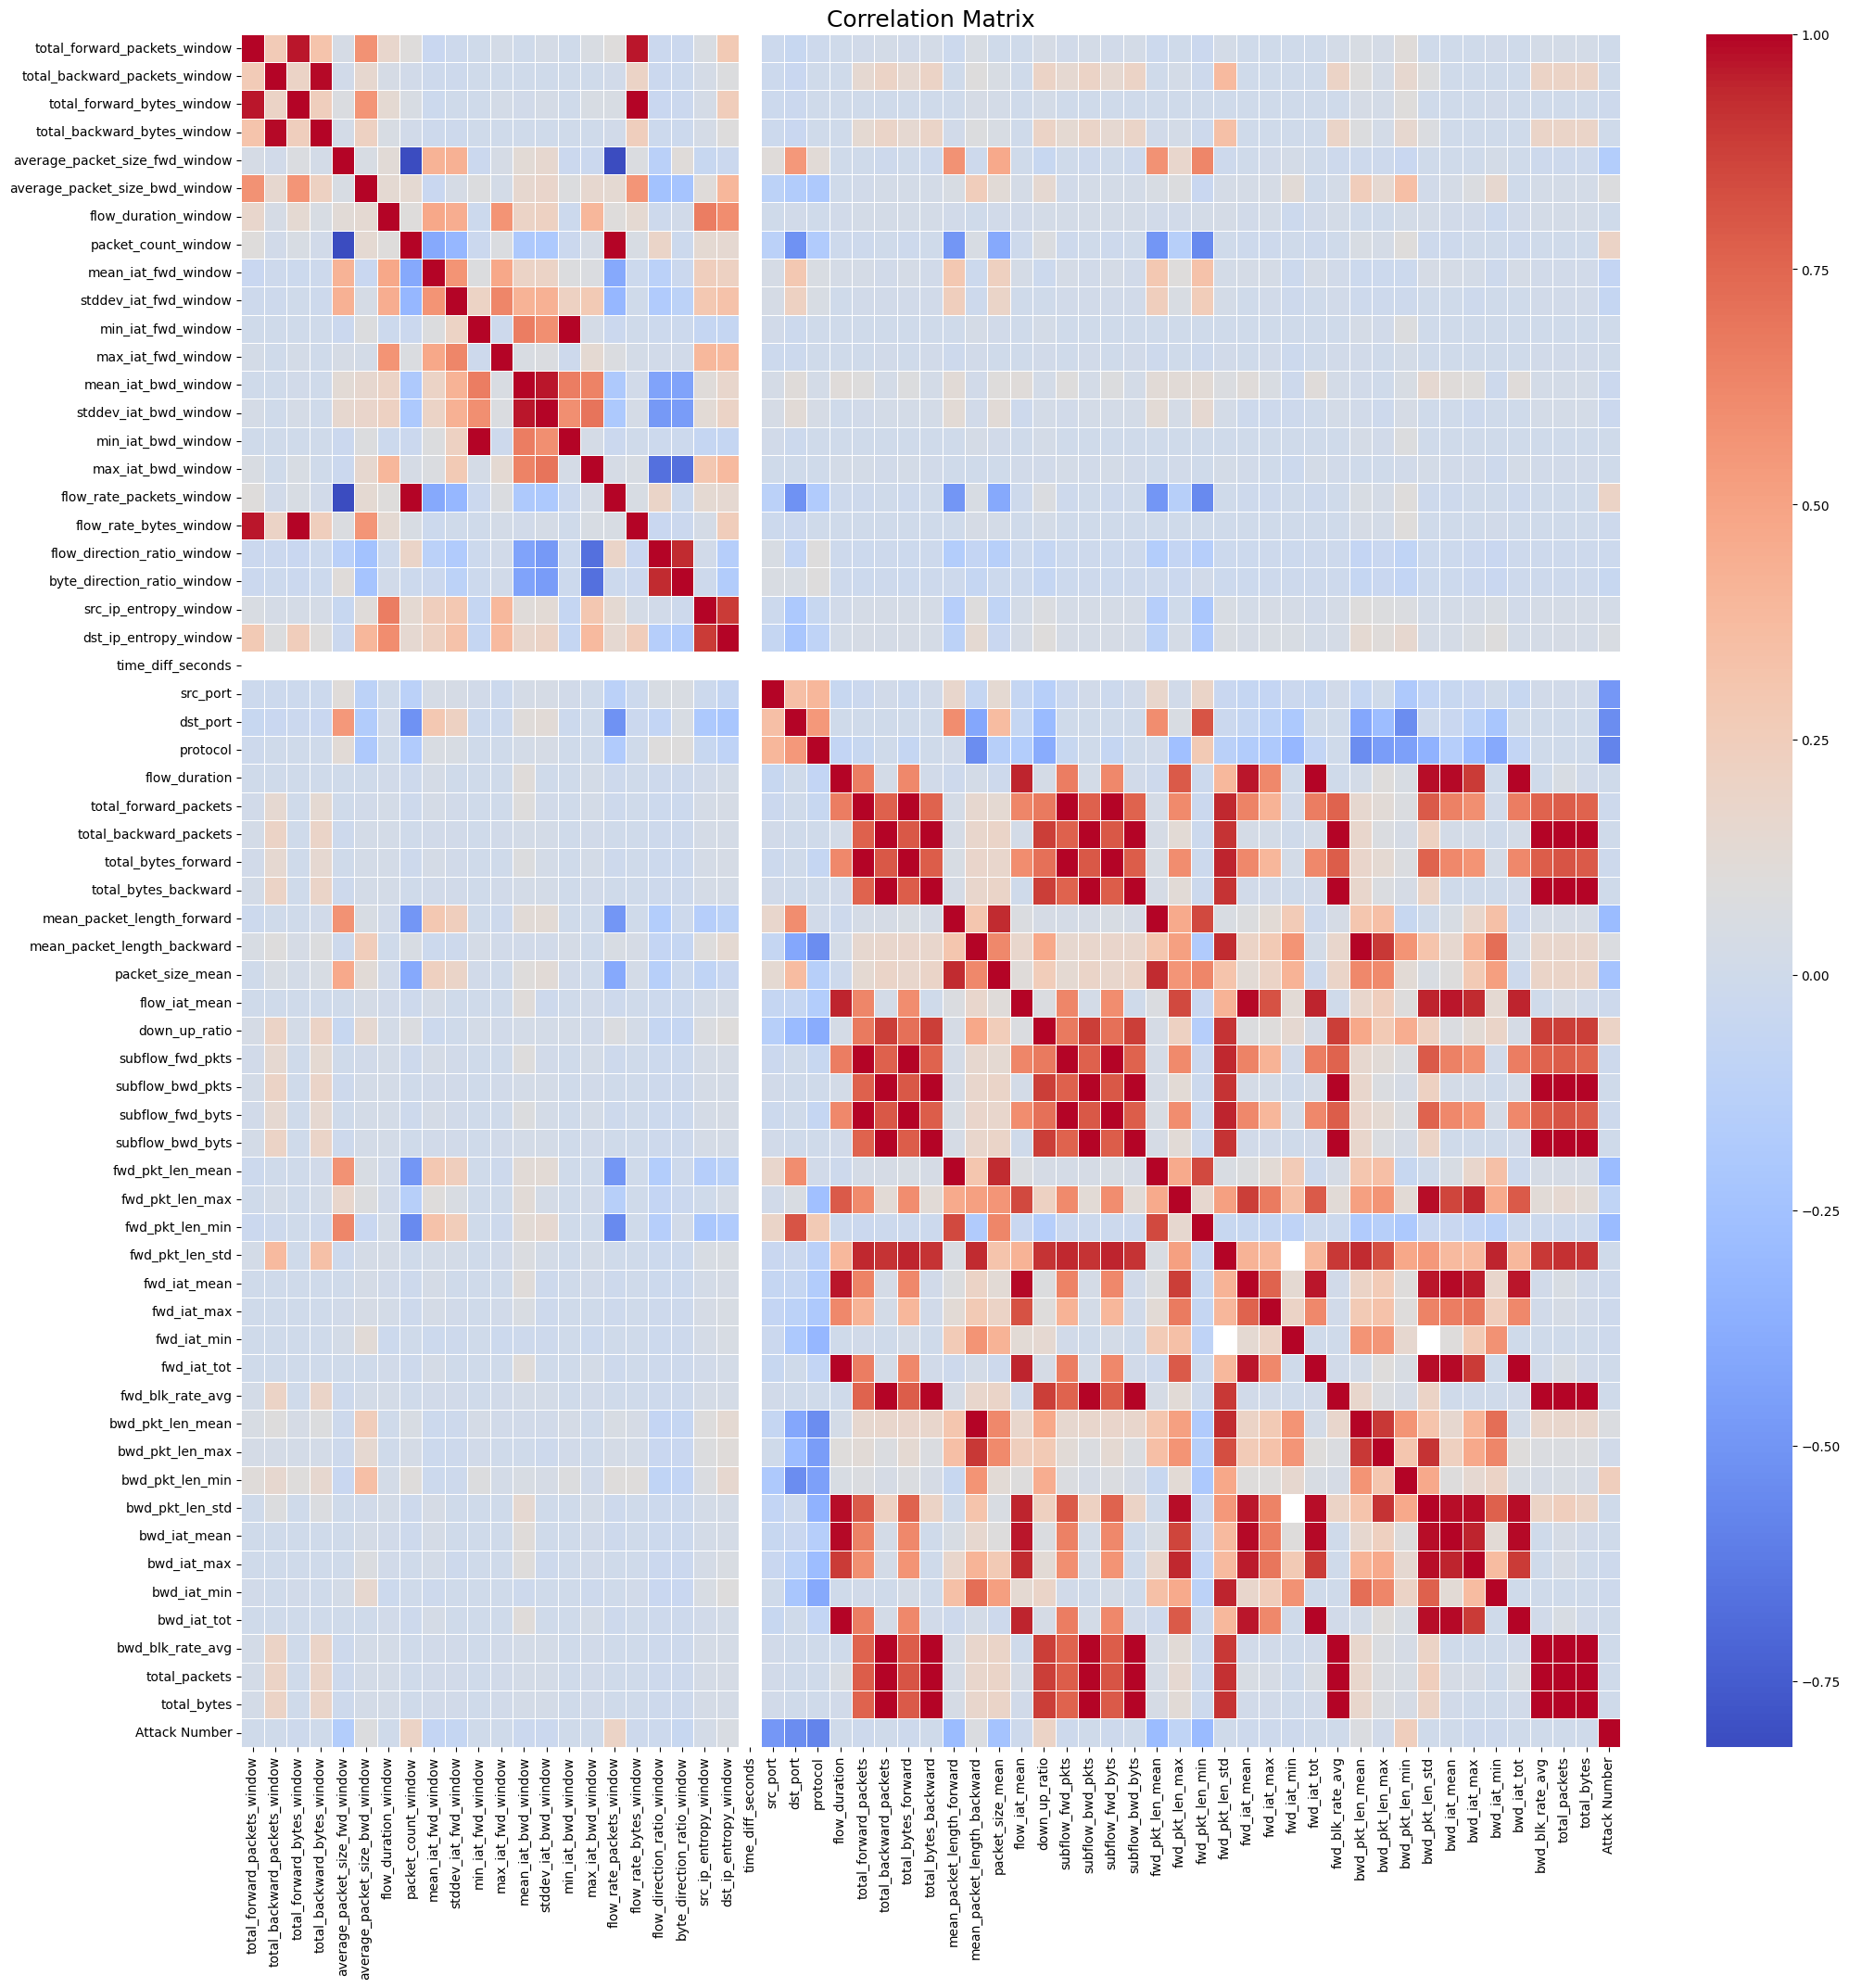

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(correlation, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features w.r.t Attacks
positive_correlation = correlation['Attack Number'][(correlation['Attack Number'] > 0) & (correlation['Attack Number'] < 1)].index.tolist()

print("Positive correlation features w.r.t Attacks:\n")
for i, features in enumerate(positive_correlation, start = 1):
    correlation_value = correlation.loc[features, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', features, correlation_value))

Positive correlation features w.r.t Attacks:

1.  average_packet_size_bwd_window :0.08
2.  packet_count_window      :0.2
3.  flow_rate_packets_window :0.2
4.  src_ip_entropy_window    :0.02
5.  dst_ip_entropy_window    :0.06
6.  mean_packet_length_backward :0.07
7.  down_up_ratio            :0.2
8.  bwd_pkt_len_mean         :0.07
9.  bwd_pkt_len_max          :0.01
10. bwd_pkt_len_min          :0.24


In [ ]:
print(f'No of important features: {len(positive_correlation)}')

No of important features: 10


In [ ]:
# zero standard deviation
std = aggregated_data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['time_diff_seconds']

In [ ]:
# unique value
indent = '{:<3} {:<30}: {}'
print('Unique value count on Data: ')
for i, feature in enumerate(list(aggregated_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, aggregated_data[feature].nunique()))

Unique value count on Data: 
1.  start_time                    : 23986
2.  end_time_x                    : 23986
3.  total_forward_packets_window  : 190
4.  total_backward_packets_window : 101
5.  total_forward_bytes_window    : 3690
6.  total_backward_bytes_window   : 343
7.  average_packet_size_fwd_window: 3674
8.  average_packet_size_bwd_window: 802
9.  flow_duration_window          : 4597
10. packet_count_window           : 123
11. mean_iat_fwd_window           : 4560
12. stddev_iat_fwd_window         : 4553
13. min_iat_fwd_window            : 3
14. max_iat_fwd_window            : 4091
15. mean_iat_bwd_window           : 1977
16. stddev_iat_bwd_window         : 1980
17. min_iat_bwd_window            : 3
18. max_iat_bwd_window            : 1628
19. flow_rate_packets_window      : 123
20. flow_rate_bytes_window        : 3690
21. flow_direction_ratio_window   : 761
22. byte_direction_ratio_window   : 4068
23. src_ip_entropy_window         : 1237
24. dst_ip_entropy_window         : 107

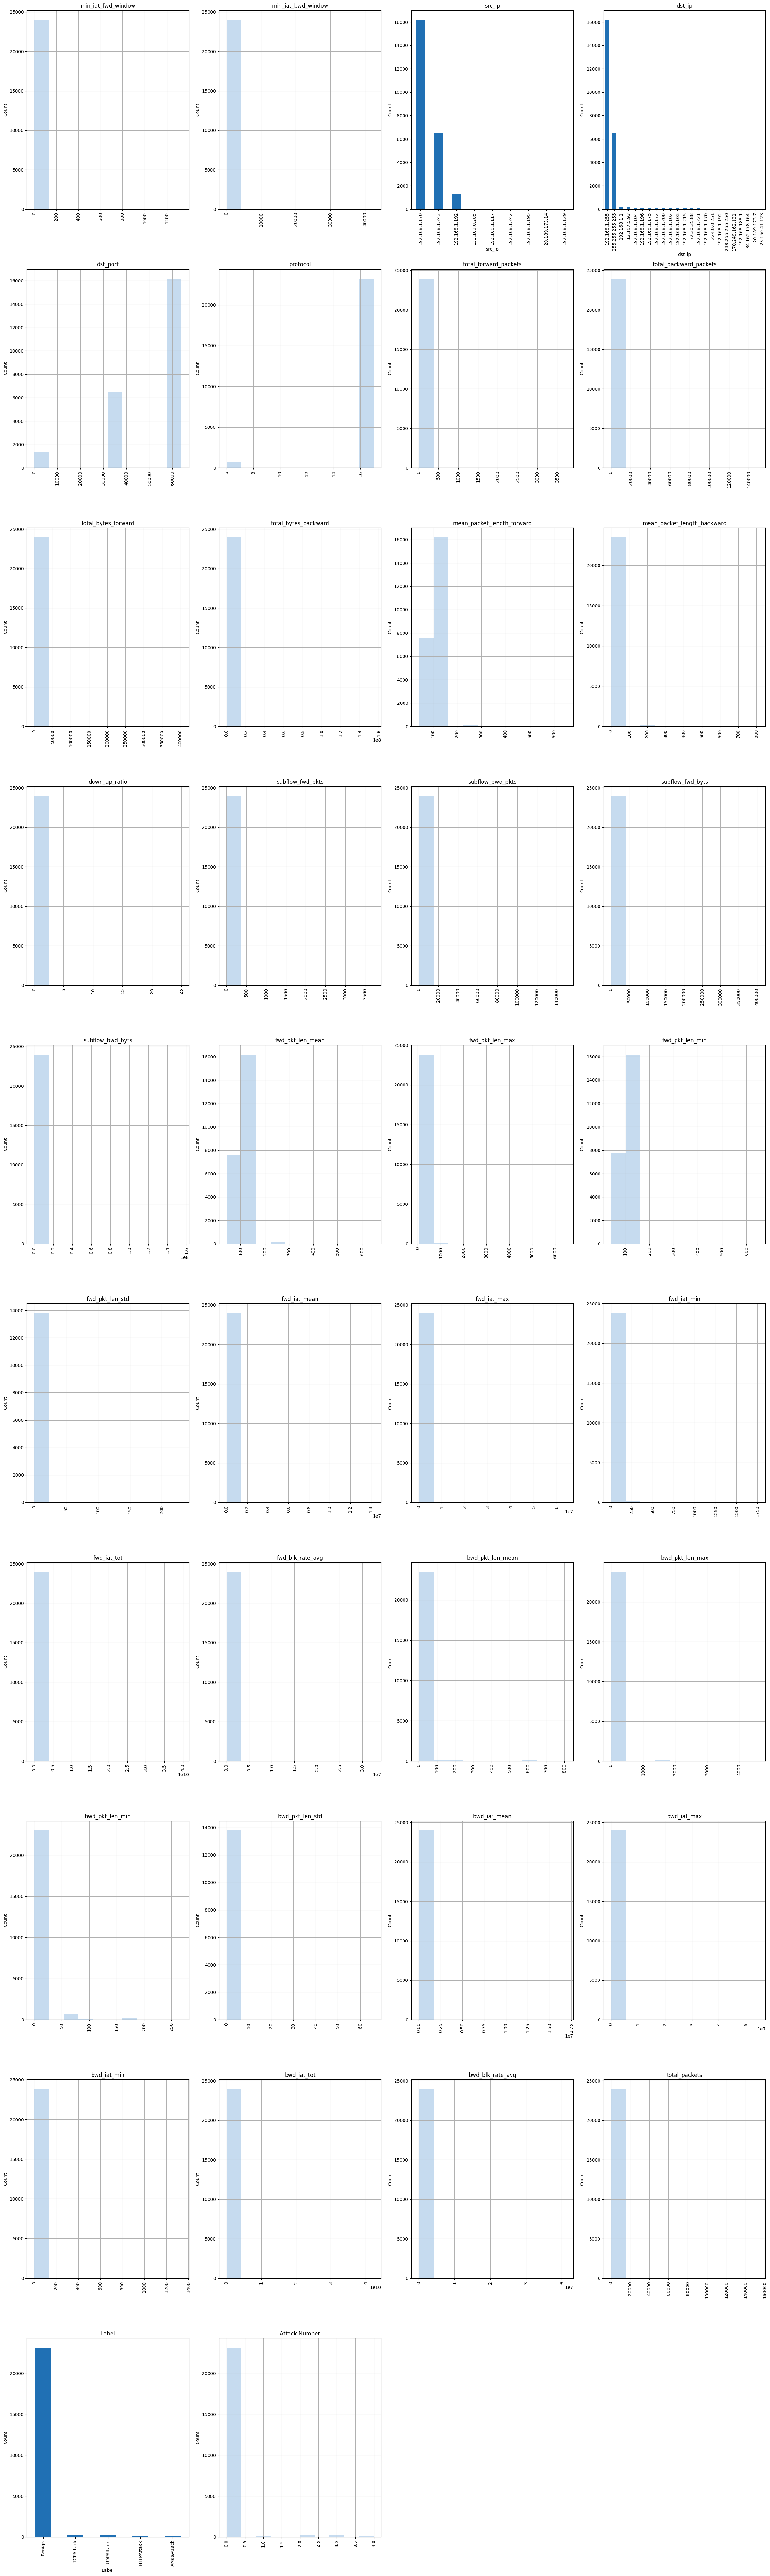

In [ ]:
unique_values = aggregated_data.nunique()
selected_cols = aggregated_data[[col for col in aggregated_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


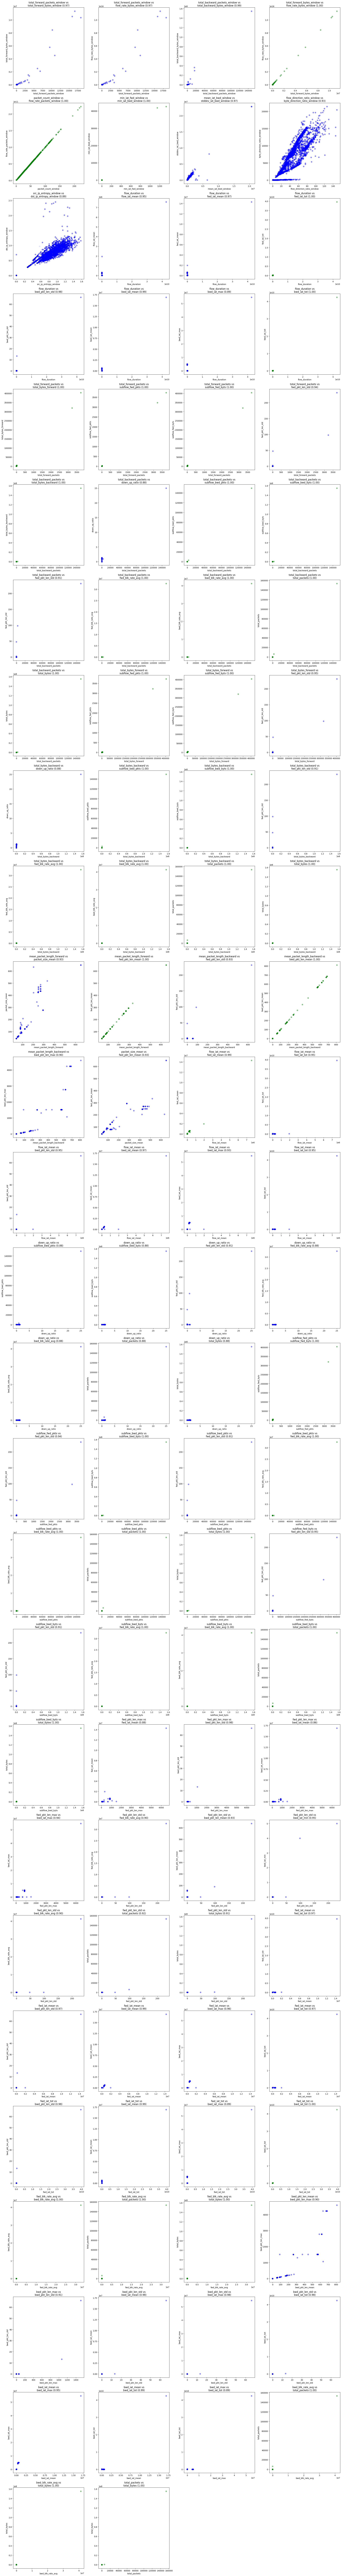

In [ ]:
cols = aggregated_data.select_dtypes(include=[np.number]).columns
high_corr_pairs = []
corr_th = 0.85

# correlations numeric columns
for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = aggregated_data[cols[i]].corr(aggregated_data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

# number of correlation pairs
size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(aggregated_data[x], aggregated_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(aggregated_data[x], aggregated_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

In [ ]:
aggregated_data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
# outliers
numeric_data = aggregated_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']
print(outlier_stats)

                                Outlier Count  Outlier Percentage
total_forward_packets_window              461                1.92
total_backward_packets_window            1131                4.72
total_forward_bytes_window                236                0.98
total_backward_bytes_window              1756                7.32
average_packet_size_fwd_window             10                0.04
average_packet_size_bwd_window           1901                7.93
flow_duration_window                      196                0.82
packet_count_window                       666                2.78
mean_iat_fwd_window                       285                1.19
stddev_iat_fwd_window                     720                3.00
min_iat_fwd_window                         10                0.04
max_iat_fwd_window                        460                1.92
mean_iat_bwd_window                       175                0.73
stddev_iat_bwd_window                      80                0.33
min_iat_bw

In [ ]:
# outliers w.r.t attack type
outlier_counts = {}
for i in numeric_data:
    for label in aggregated_data['Label'].unique():
        attack_data = aggregated_data[i][aggregated_data['Label'] == label]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, label)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for label in aggregated_data['Label'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, label)]
    print(f'- {label}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: total_forward_packets_window
- XMasAttack: 6 (4.62%)
- Benign: 434 (1.87%)
- TCPAttack: 0 (0.00%)
- UDPAttack: 5 (1.89%)
- HTTPAttack: 0 (0.00%)

Feature: total_backward_packets_window
- XMasAttack: 25 (19.23%)
- Benign: 867 (3.74%)
- TCPAttack: 0 (0.00%)
- UDPAttack: 12 (4.53%)
- HTTPAttack: 0 (0.00%)

Feature: total_forward_bytes_window
- XMasAttack: 3 (2.31%)
- Benign: 222 (0.96%)
- TCPAttack: 4 (1.48%)
- UDPAttack: 1 (0.38%)
- HTTPAttack: 0 (0.00%)

Feature: total_backward_bytes_window
- XMasAttack: 12 (9.23%)
- Benign: 1482 (6.40%)
- TCPAttack: 4 (1.48%)
- UDPAttack: 38 (14.34%)
- HTTPAttack: 26 (15.76%)

Feature: average_packet_size_fwd_window
- XMasAttack: 0 (0.00%)
- Benign: 10 (0.04%)
- TCPAttack: 4 (1.48%)
- UDPAttack: 0 (0.00%)
- HTTPAttack: 4 (2.42%)

Feature: average_packet_size_bwd_window
- XMasAttack: 0 (0.00%)
- Benign: 1549 (6.69%)
- TCPAttack: 0 (0.00%)
- UDPAttack: 45 (16.98%)
- HTTPAttack: 0 (0.00%)

Feature: flow_duration_window
- XMasAttack: 1 (0.77%)
- B

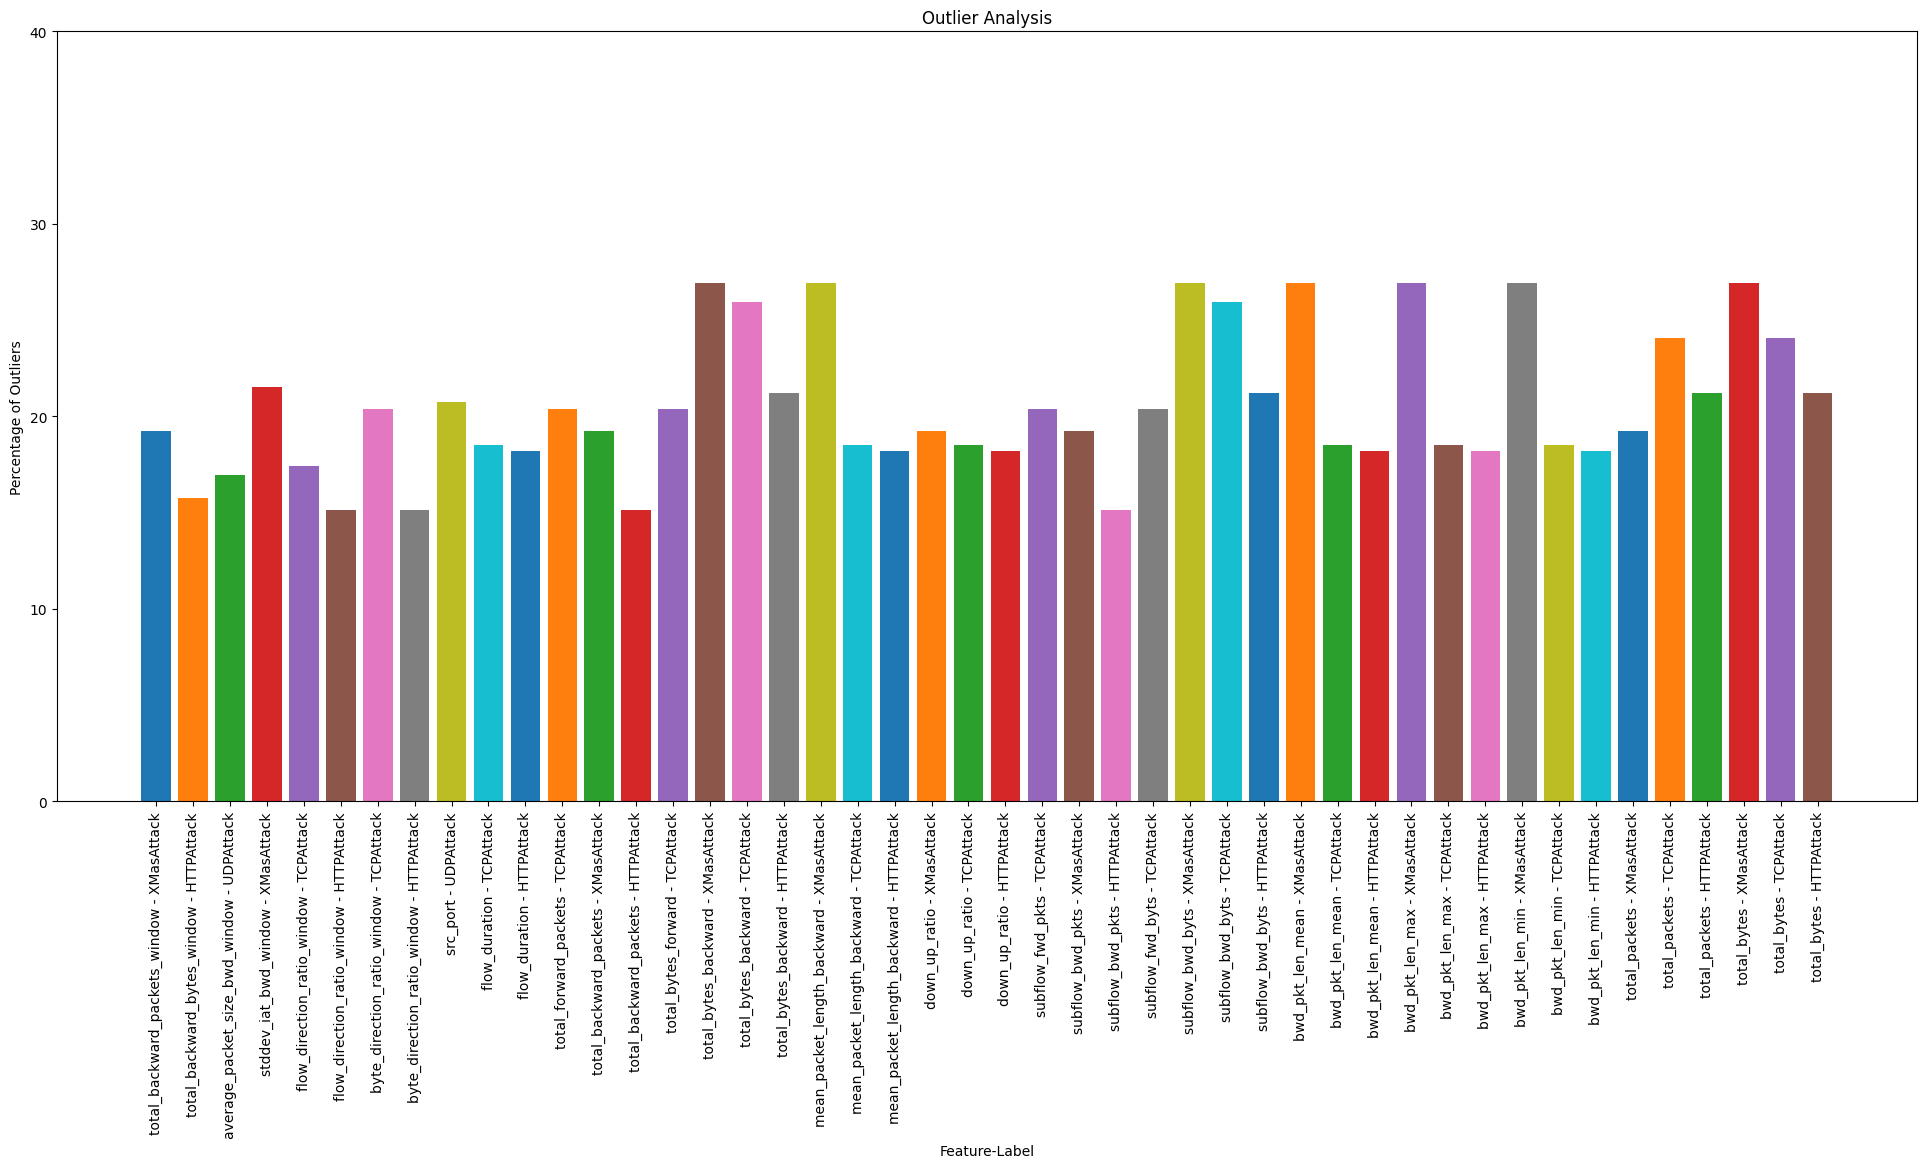

In [ ]:
# % of outliers > 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for label in aggregated_data['Label'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, label)]
        if outlier_percent > 15:
            ax.bar(f'{i} - {label}', outlier_percent)

ax.set_xlabel('Feature-Label')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

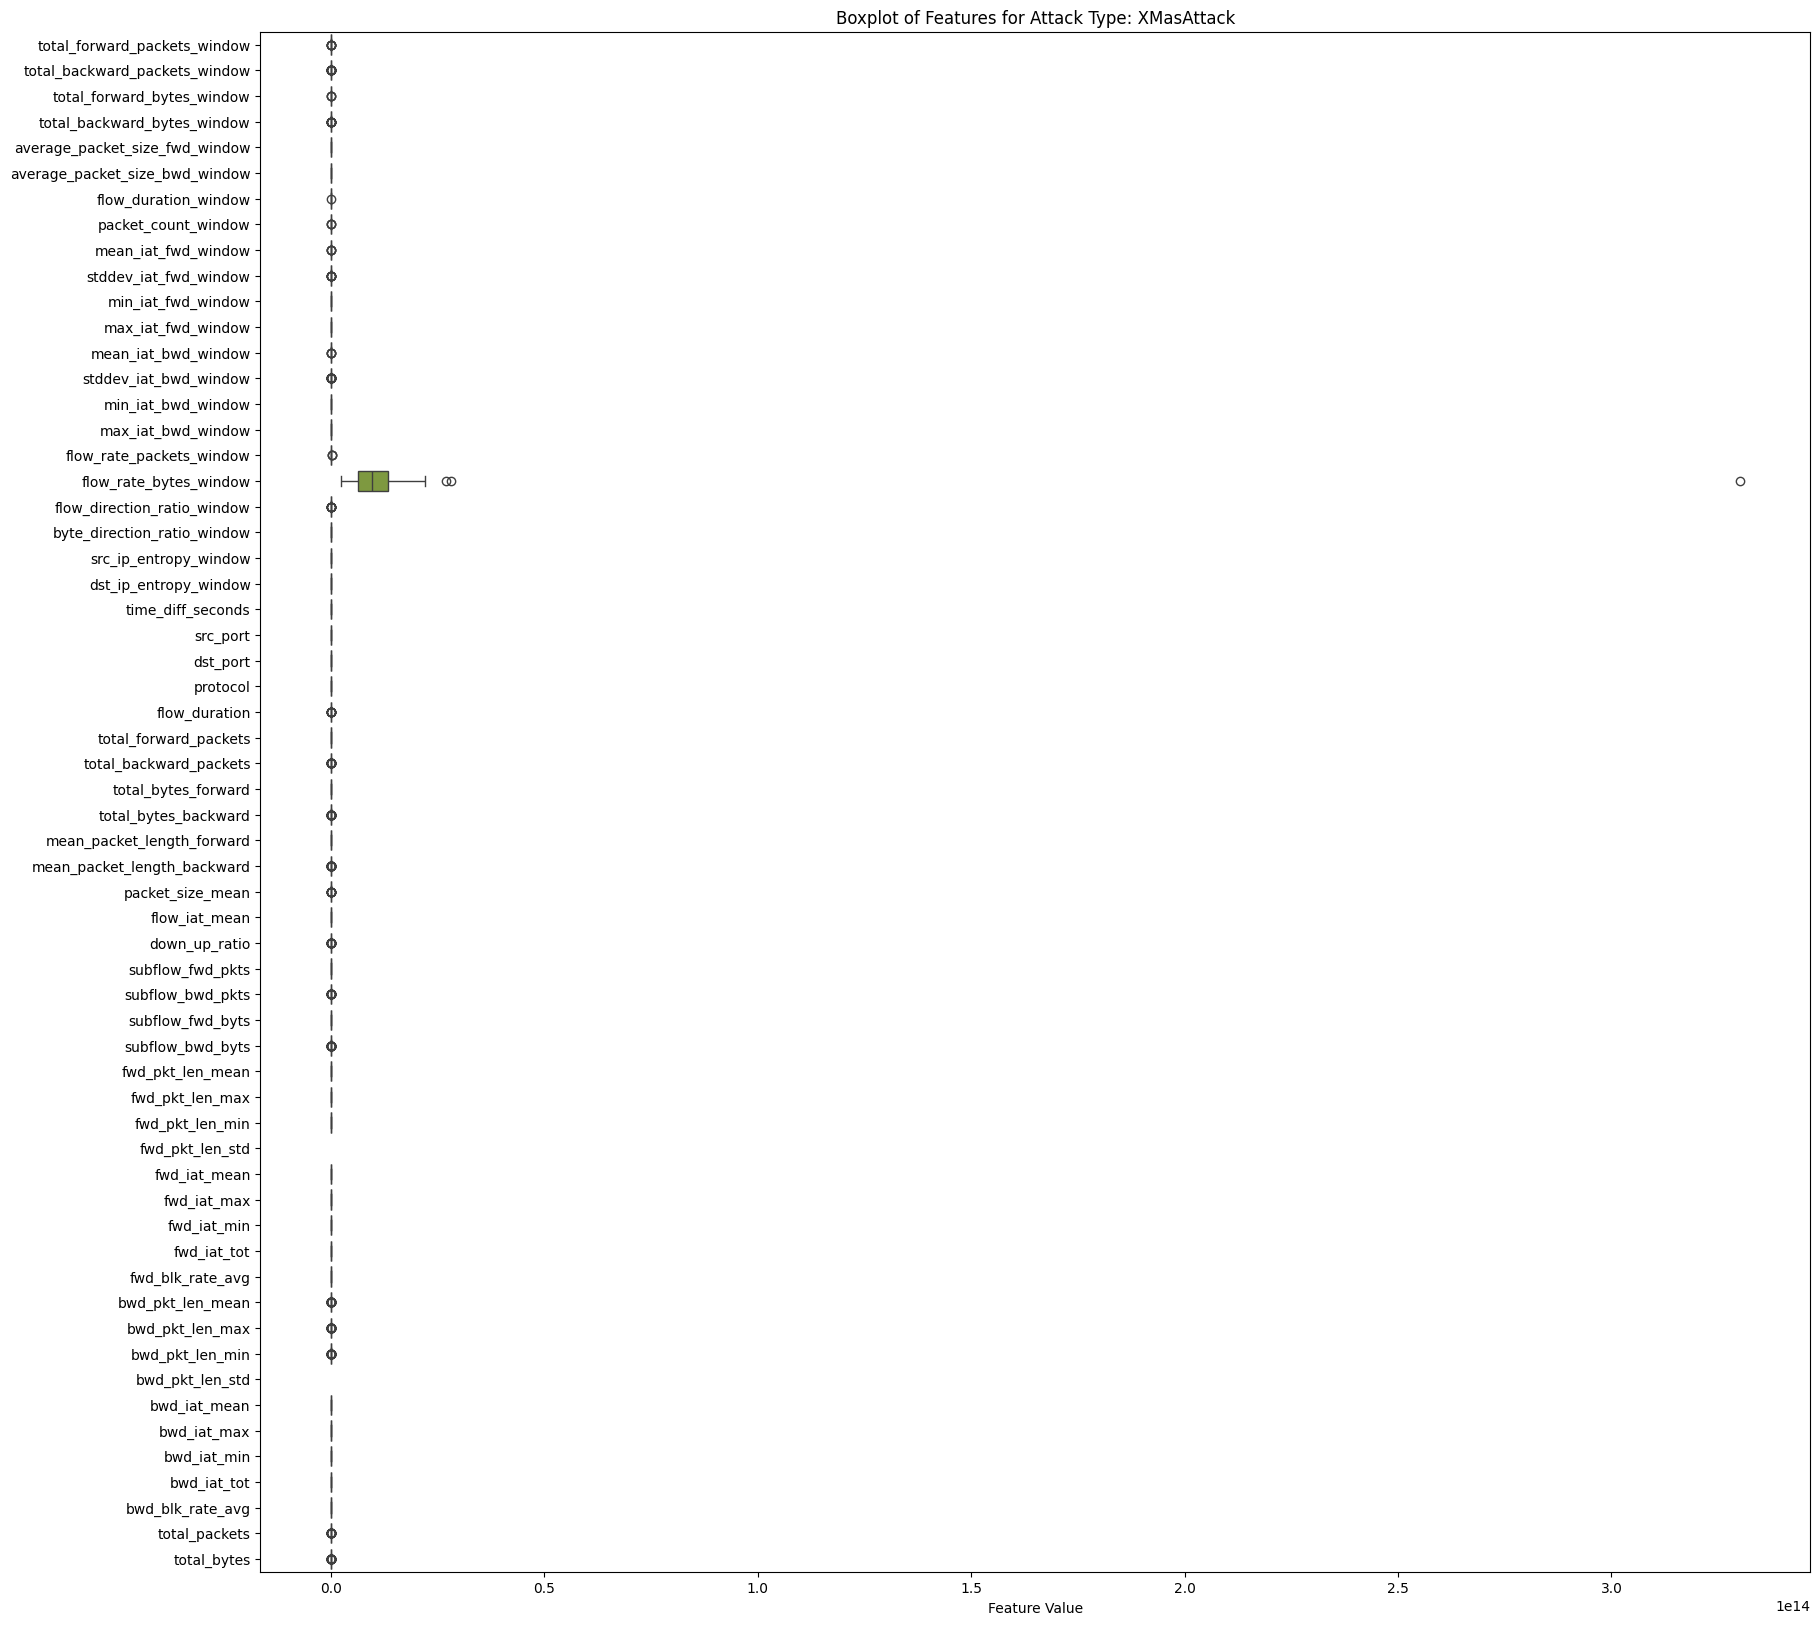

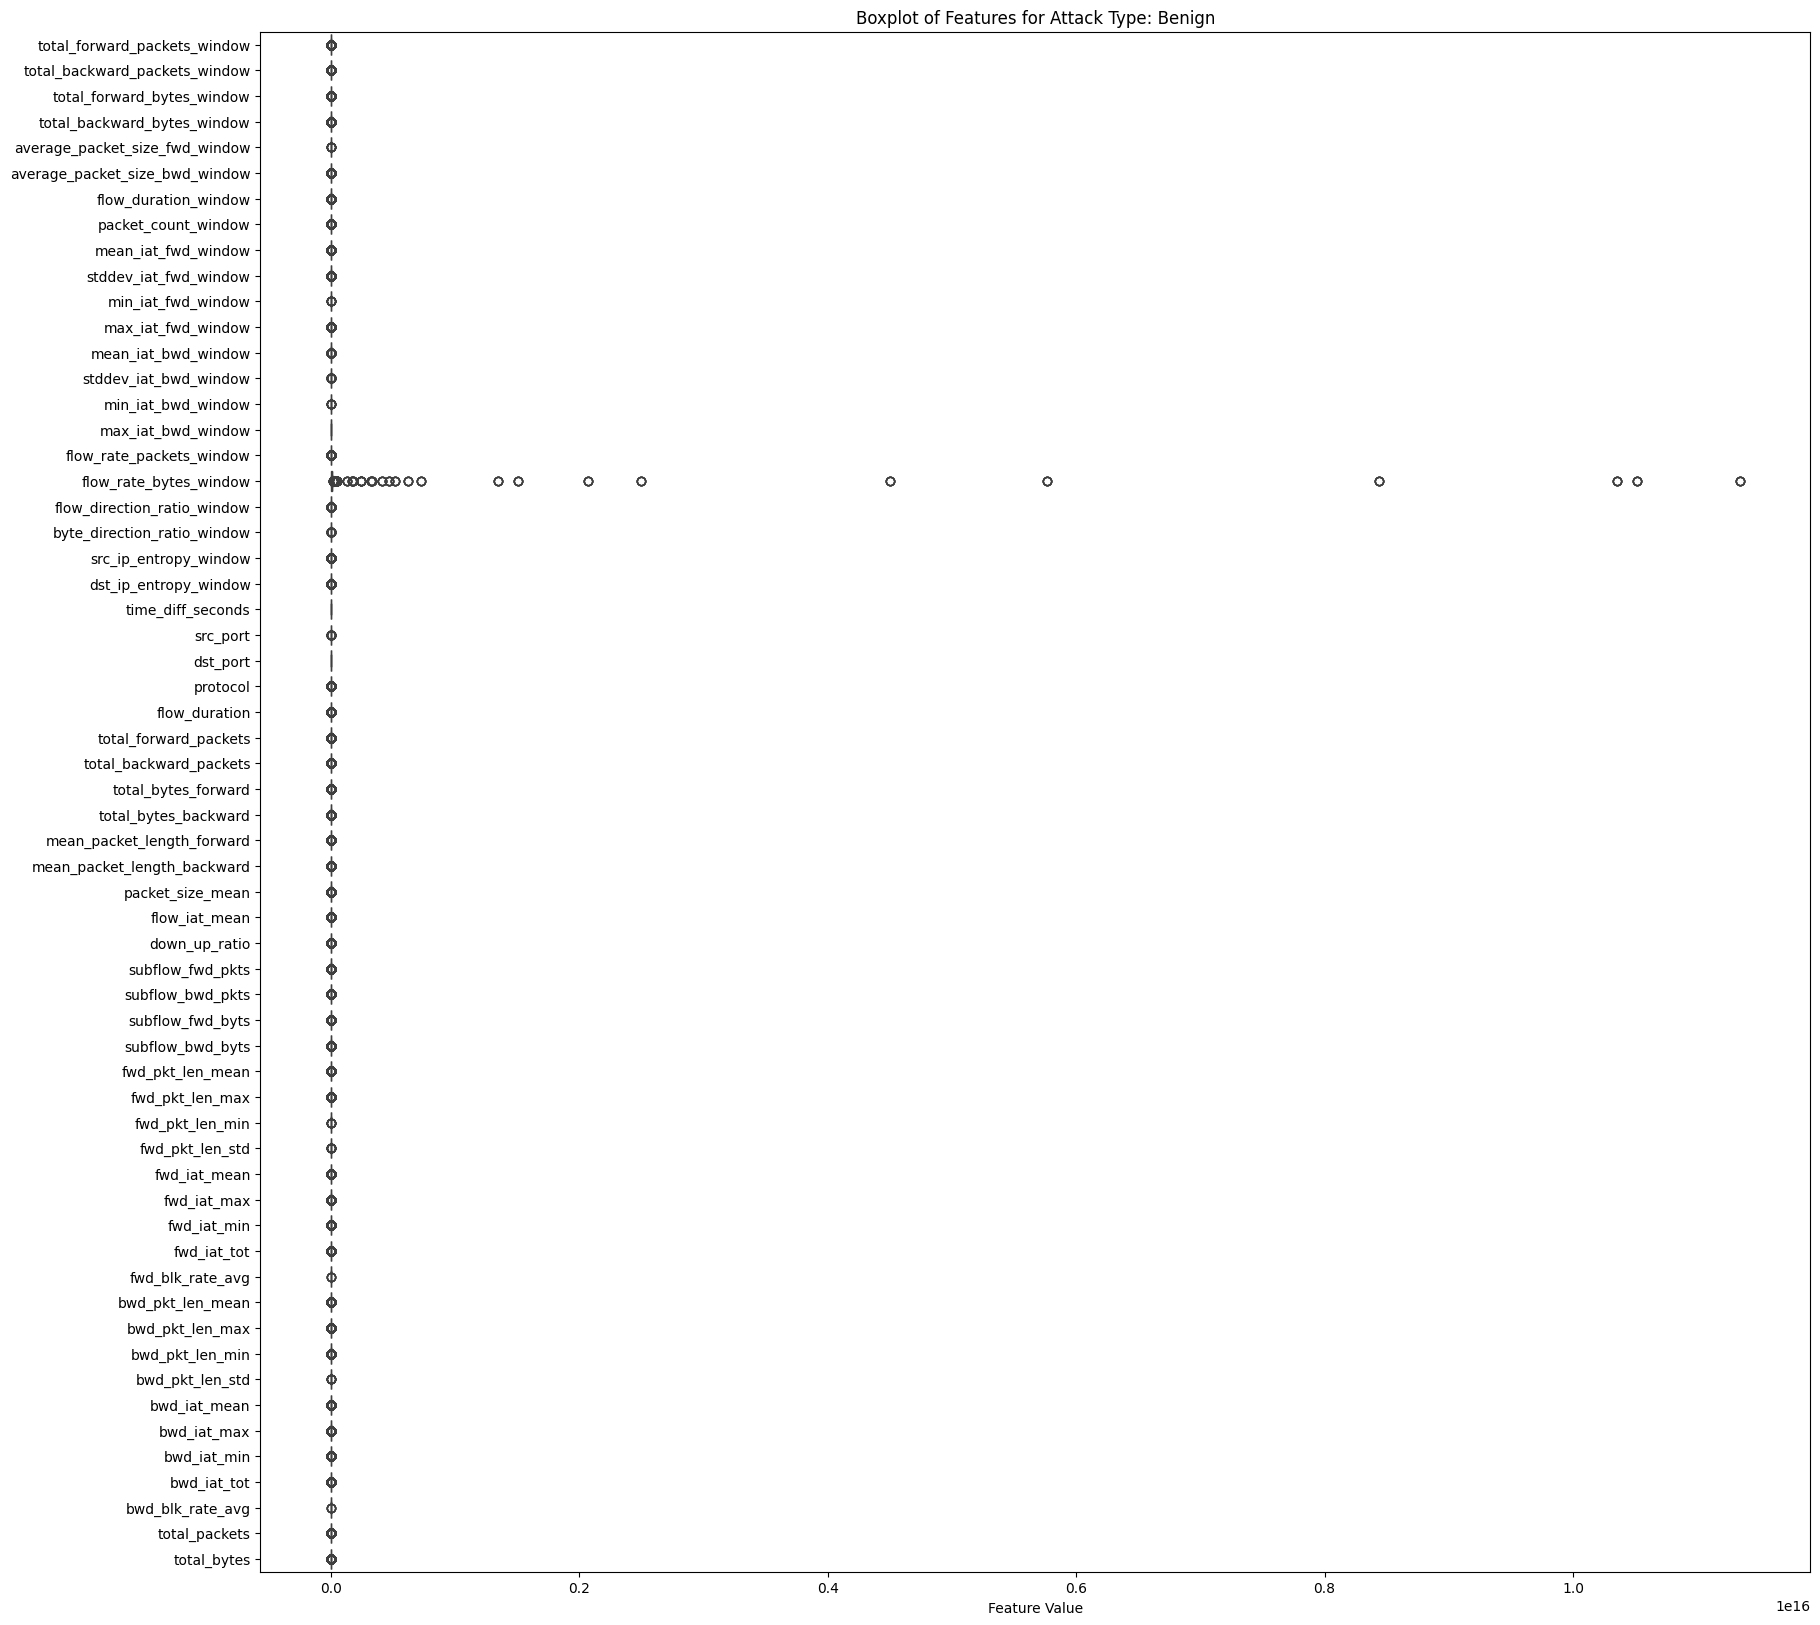

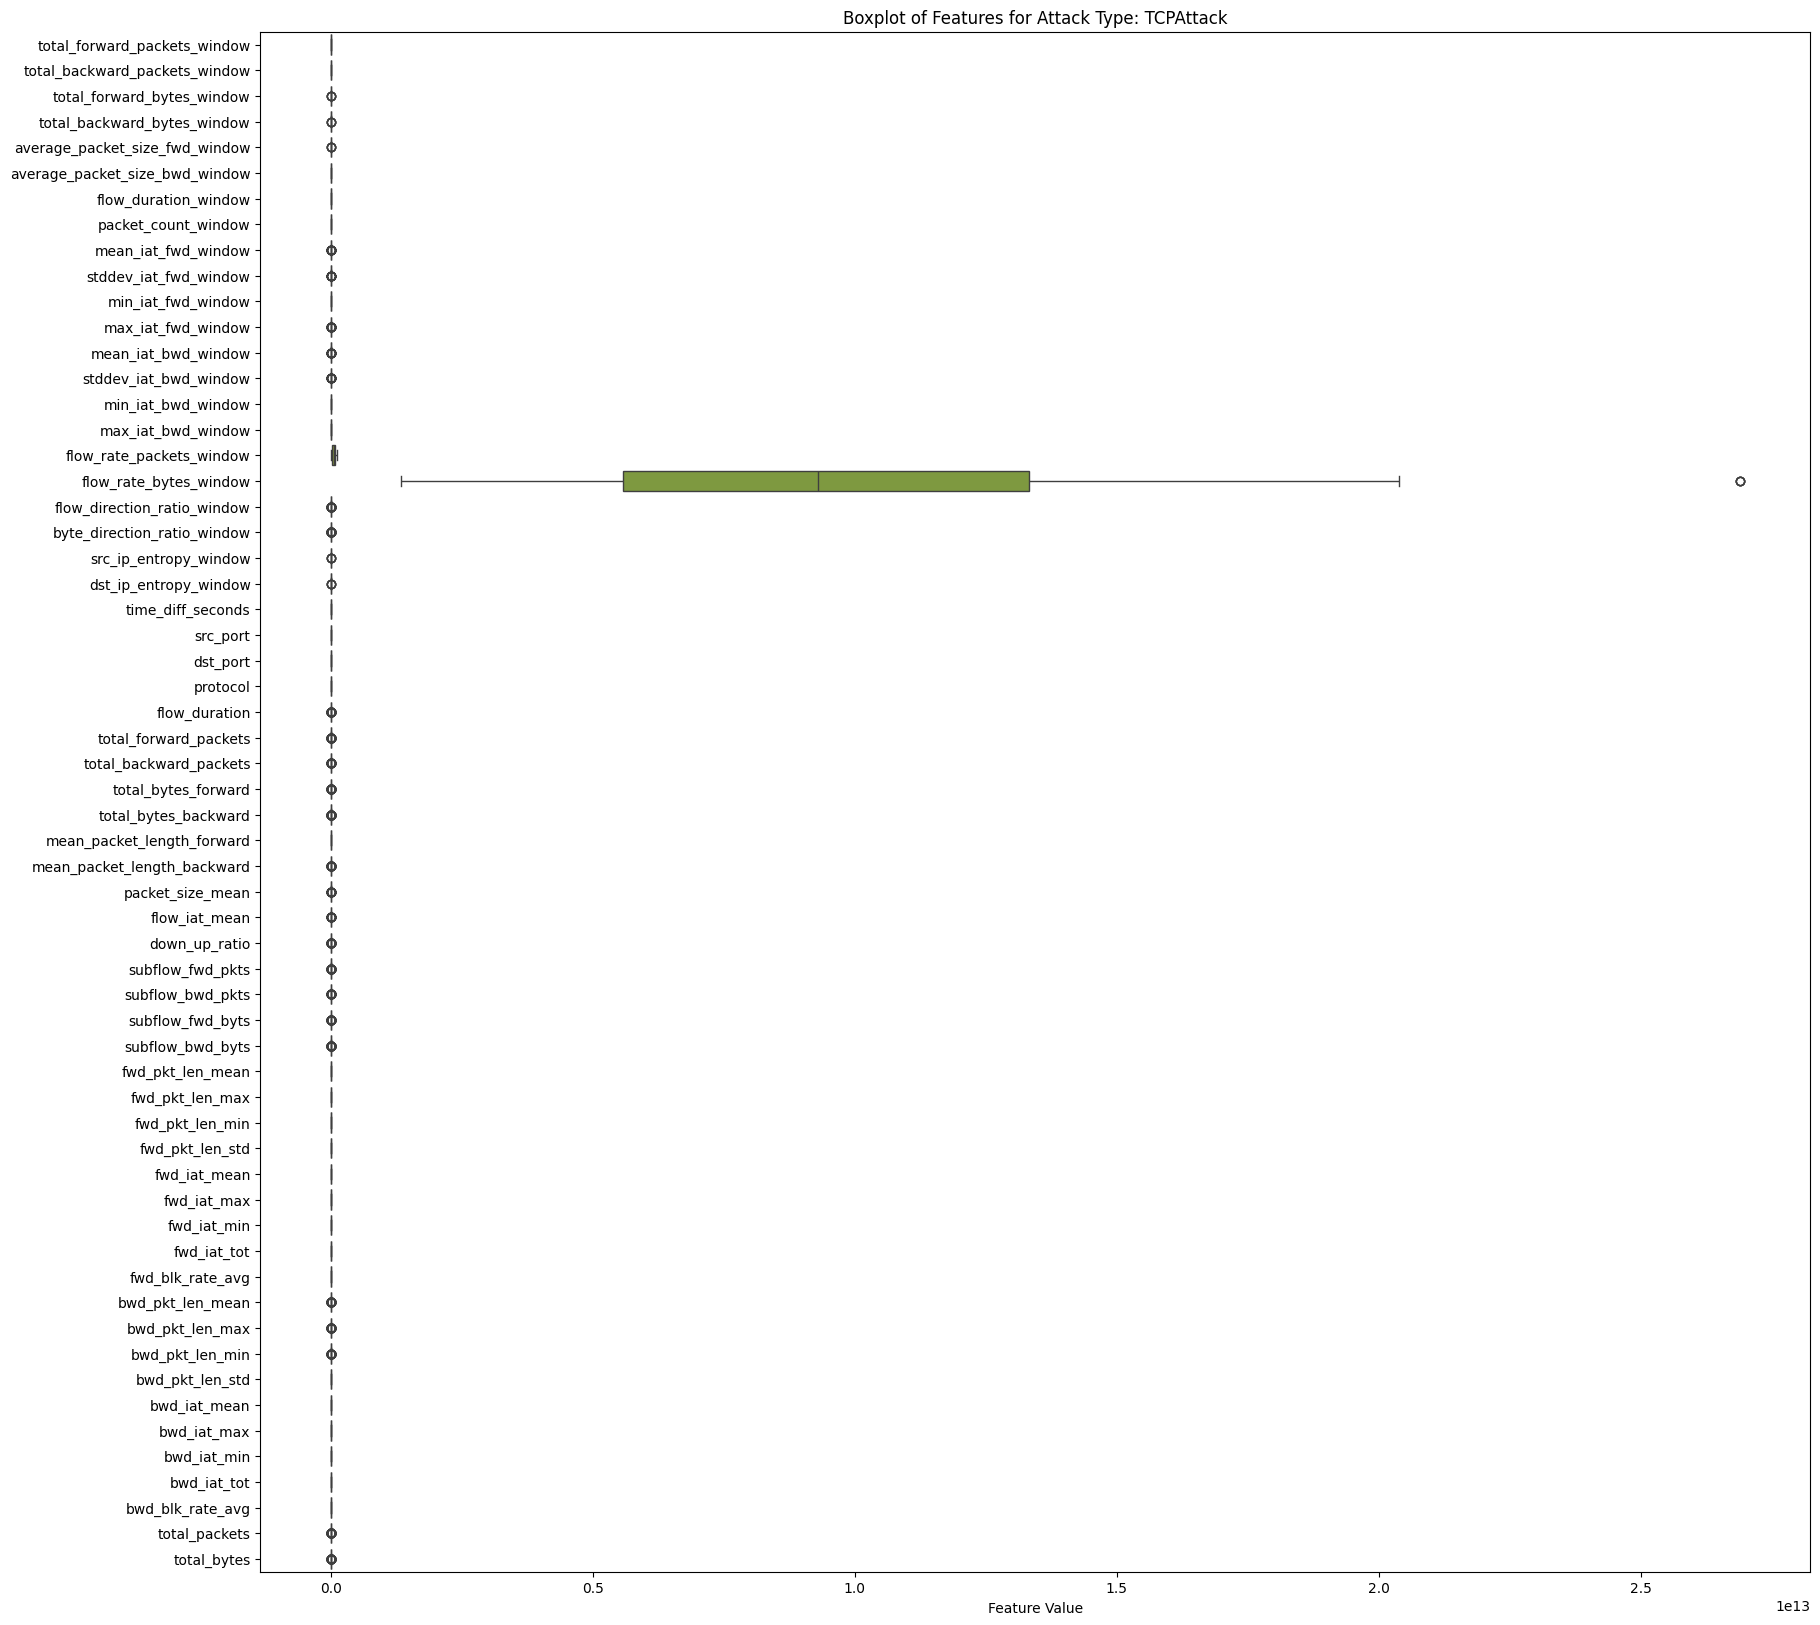

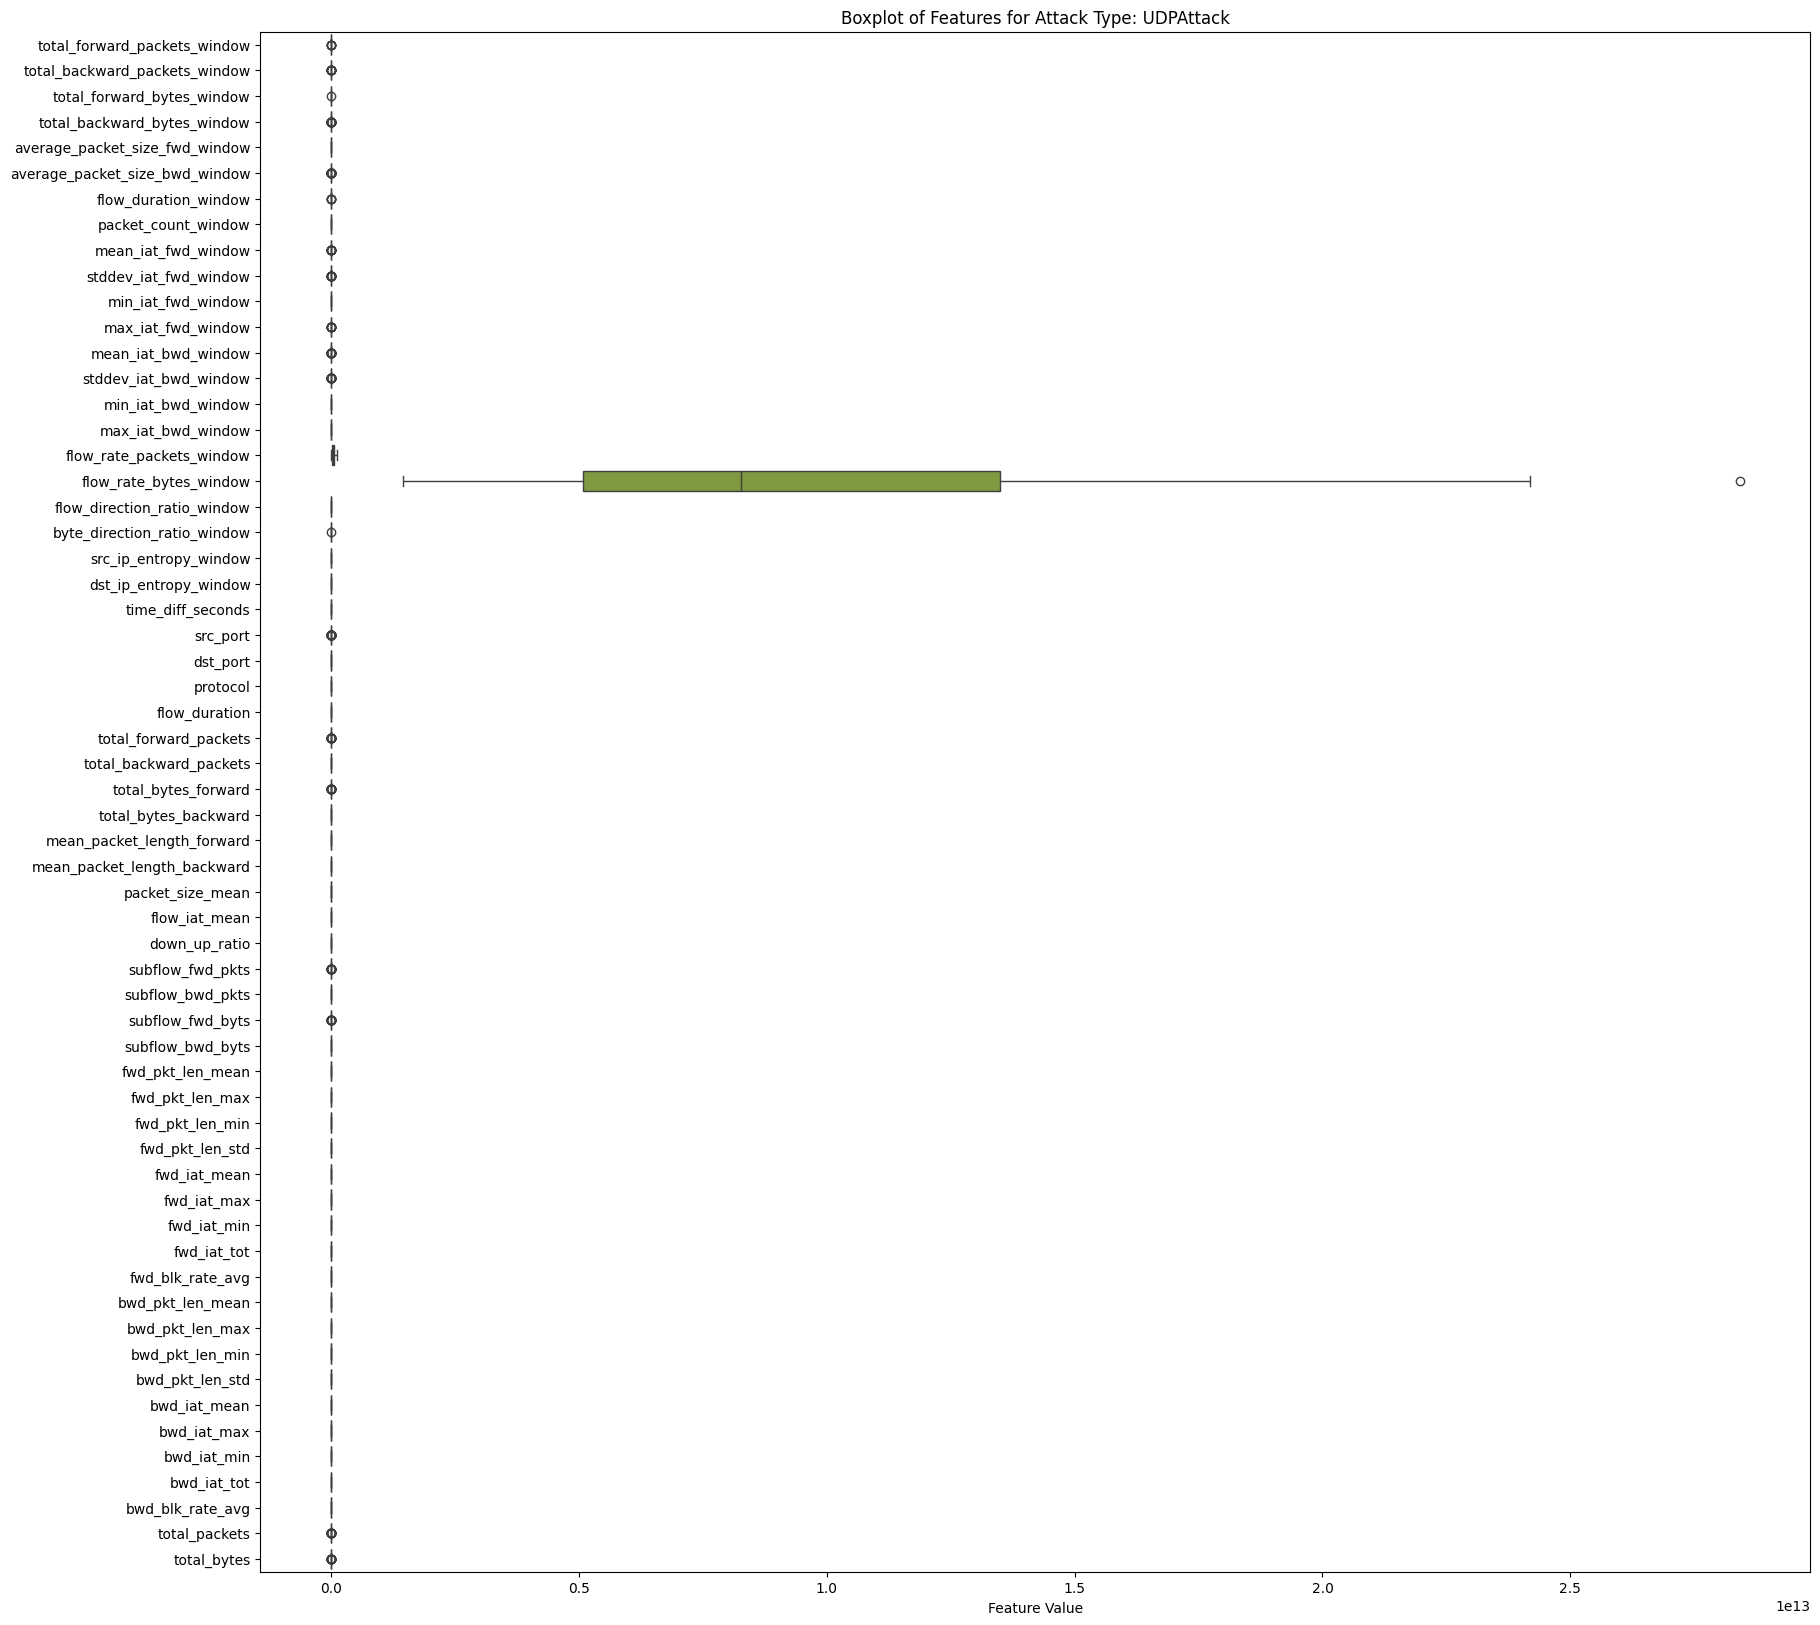

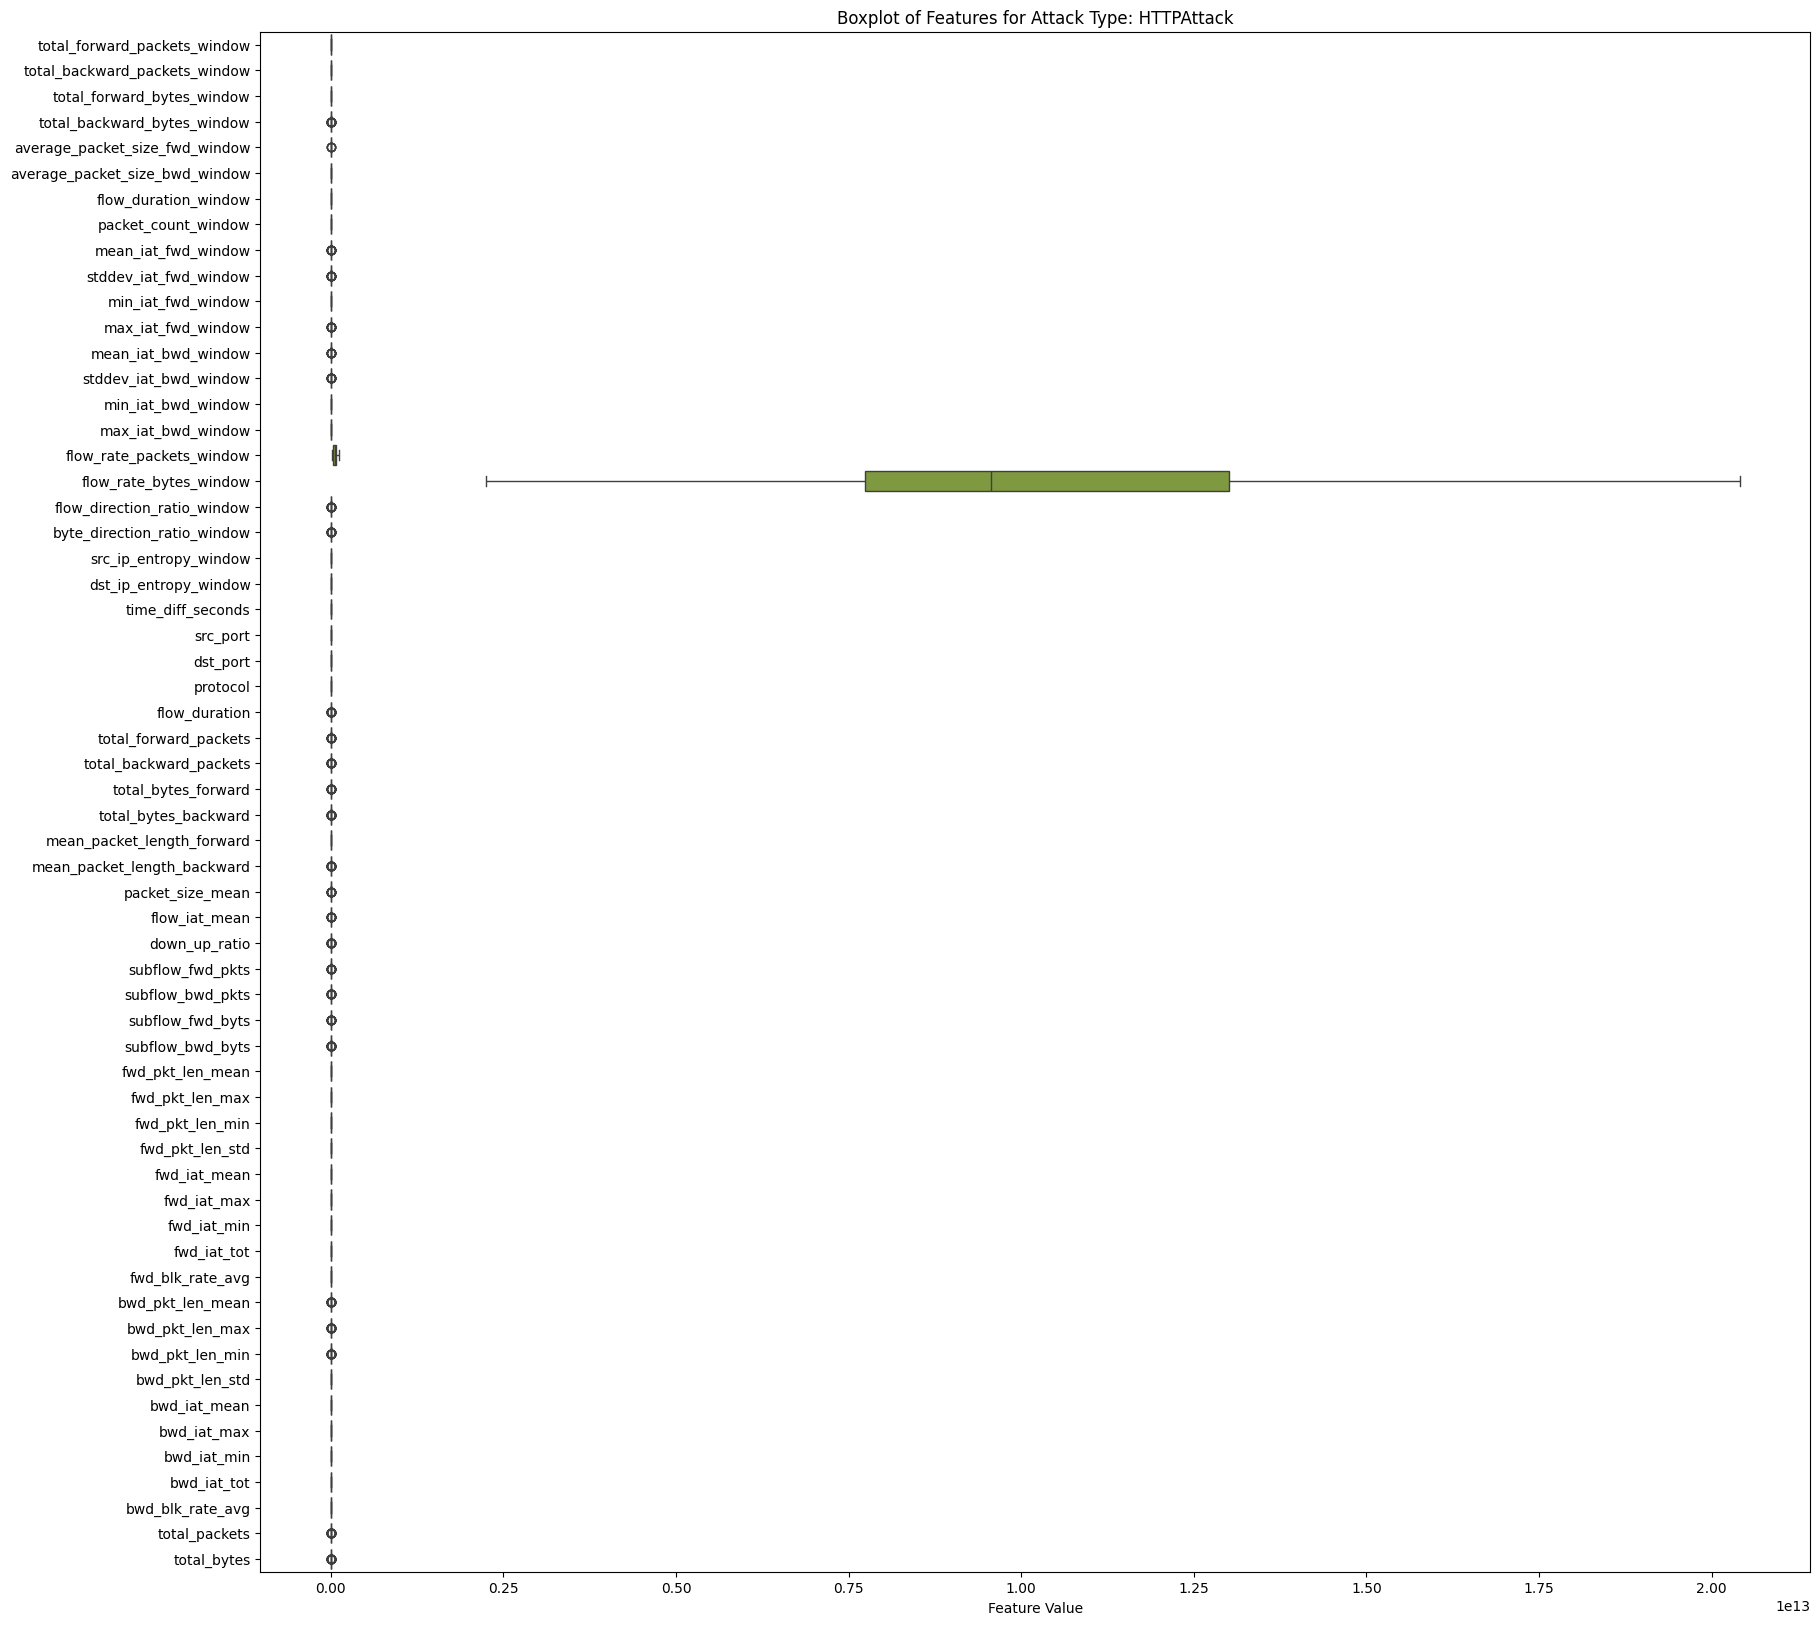

In [ ]:
for attack_type in aggregated_data['Label'].unique():
    attack_data = aggregated_data[aggregated_data['Label'] == attack_type]

    plt.figure(figsize=(20, 20))

    sns.boxplot(data = attack_data.drop(columns = ['Label']), orient = 'h')

    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')

    plt.show()

In [ ]:
aggregated_data.groupby('Label').first()

start_time          end_time_x  \
Label                                                
Benign     2024-08-13 08:01:00 2024-08-13 08:01:05   
HTTPAttack 2024-08-13 13:59:00 2024-08-13 13:59:05   
TCPAttack  2024-08-13 09:56:00 2024-08-13 09:56:05   
UDPAttack  2024-08-13 11:58:00 2024-08-13 11:58:05   
XMasAttack 2024-08-13 08:00:00 2024-08-13 08:00:05   

            total_forward_packets_window  total_backward_packets_window  \
Label                                                                     
Benign                                42                              9   
HTTPAttack                           133                             59   
TCPAttack                             98                             23   
UDPAttack                             72                              0   
XMasAttack                           261                            158   

            total_forward_bytes_window  total_backward_bytes_window  \
Label                                                                 
Benign                            6232                          671   
HTTPAttack                        8922                         3666   
TCPAttack                        14371                         1583   
UDPAttack                         3972                            0   
XMasAttack                       28218                        11769   

            average_packet_size_fwd_window  average_packet_size_bwd_window  \
Label                                                                        
Benign                          134.525210                        8.519608   
HTTPAttack                       66.052910                       48.793651   
TCPAttack                        97.714815                       30.751852   
UDPAttack                        55.166667                        0.000000   
XMasAttack                       64.239935                       56.293254   

            flow_duration_window  packet_count_window  ...  bwd_pkt_len_min  \
Label                                                  ...                    
Benign                 208424228                   17  ...                0   
HTTPAttack             453916192                   63  ...               60   
TCPAttack              563678648                   30  ...               60   
UDPAttack                      0                   72  ...                0   
XMasAttack            1370937322                  126  ...               60   

            bwd_pkt_len_std  bwd_iat_mean  bwd_iat_max  bwd_iat_min  \
Label                                                                 
Benign            66.085113           0.0            0            0   
HTTPAttack         0.000000           0.0            0            0   
TCPAttack          0.000000           0.0            0            0   
UDPAttack          0.000000           0.0            0            0   
XMasAttack              NaN           0.0            0            0   

            bwd_iat_tot  bwd_blk_rate_avg          end_time_y  total_packets  \
Label                                                                          
Benign                0               0.0 2024-08-13 08:01:00              1   
HTTPAttack            0               0.0 2024-08-13 13:59:00              3   
TCPAttack             0               0.0 2024-08-13 09:56:00              3   
UDPAttack             0               0.0 2024-08-13 11:58:00              1   
XMasAttack            0               0.0 2024-08-13 08:00:00              2   

            total_bytes  
Label                    
Benign              121  
HTTPAttack          168  
TCPAttack           168  
UDPAttack            42  
XMasAttack          114  

[5 rows x 66 columns]

In [ ]:
# Data Preprocessing
# Dropping one unique value columns
num_unique = aggregated_data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
aggregated_data = aggregated_data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['time_diff', 'time_diff_seconds'], dtype='object')

In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23986 entries, 0 to 23985
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   start_time                      23986 non-null  datetime64[ns]
 1   end_time_x                      23986 non-null  datetime64[ns]
 2   total_forward_packets_window    23986 non-null  int64         
 3   total_backward_packets_window   23986 non-null  int64         
 4   total_forward_bytes_window      23986 non-null  int64         
 5   total_backward_bytes_window     23986 non-null  int64         
 6   average_packet_size_fwd_window  23986 non-null  float64       
 7   average_packet_size_bwd_window  23986 non-null  float64       
 8   flow_duration_window            23986 non-null  int64         
 9   packet_count_window             23986 non-null  int64         
 10  mean_iat_fwd_window             23986 non-null  float64       
 11  st

In [ ]:
drop_columns = [
    "start_time", "end_time_x", "src_ip", "dst_ip", "end_time_y"
   ]
aggregated_data.drop(columns=drop_columns, inplace=True, errors='ignore')

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = aggregated_data.drop('Label', axis = 1)
attacks = aggregated_data['Label']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Identifying missing values
missing_val = aggregated_data.isna().sum()
print(missing_val.loc[missing_val > 0])

fwd_pkt_len_std    10176
bwd_pkt_len_std    10176
dtype: int64


In [ ]:
# selecting numeric attributes columns from aggregated_data
num_col = list(aggregated_data.select_dtypes(include='number').columns)
print(num_col)

['total_forward_packets_window', 'total_backward_packets_window', 'total_forward_bytes_window', 'total_backward_bytes_window', 'average_packet_size_fwd_window', 'average_packet_size_bwd_window', 'flow_duration_window', 'packet_count_window', 'mean_iat_fwd_window', 'stddev_iat_fwd_window', 'min_iat_fwd_window', 'max_iat_fwd_window', 'mean_iat_bwd_window', 'stddev_iat_bwd_window', 'min_iat_bwd_window', 'max_iat_bwd_window', 'flow_rate_packets_window', 'flow_rate_bytes_window', 'flow_direction_ratio_window', 'byte_direction_ratio_window', 'src_ip_entropy_window', 'dst_ip_entropy_window', 'src_port', 'dst_port', 'protocol', 'flow_duration', 'total_forward_packets', 'total_backward_packets', 'total_bytes_forward', 'total_bytes_backward', 'mean_packet_length_forward', 'mean_packet_length_backward', 'packet_size_mean', 'flow_iat_mean', 'down_up_ratio', 'subflow_fwd_pkts', 'subflow_bwd_pkts', 'subflow_fwd_byts', 'subflow_bwd_byts', 'fwd_pkt_len_mean', 'fwd_pkt_len_max', 'fwd_pkt_len_min', 'fwd

In [ ]:
# Checking for infinity or NaN values and replacing them with the median value of the column
aggregated_data.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in num_col:
    if aggregated_data[col].isnull().sum() > 0:
        median_value = aggregated_data[col].median()
        aggregated_data[col] = aggregated_data[col].fillna(median_value)  # Direct assignment to avoid warning

In [ ]:
# Identifying missing values
missing_val = aggregated_data.isna().sum()
print(missing_val.loc[missing_val > 0])

Series([], dtype: int64)


In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = aggregated_data.drop('Label', axis = 1)
attacks = aggregated_data['Label']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.84%


In [ ]:
# Exploring Explained Variance
print(ipca.explained_variance_ratio_)

[0.24839171 0.14720143 0.10802658 0.0939756  0.07876512 0.05884351
 0.04937145 0.03761748 0.02904145 0.02626531 0.01847438 0.0155252
 0.01451712 0.01016783 0.00947856 0.00879759 0.00820575 0.00726246
 0.006689   0.00584895 0.00449371 0.00395828 0.00194936 0.00183469
 0.00127126 0.00081521 0.00075946 0.00046845 0.00037803]


In [ ]:
# Exploring our PCA Data
expl_var = ipca.explained_variance_ratio_
df_expl_var = pd.DataFrame(
    data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()),
    columns=['IPCA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('IPCA').mul(100).round(1)
print(df_expl_var)

      Explained Variance (%)  Total Explained Variance (%)
IPCA                                                      
1                       24.8                          24.8
2                       14.7                          39.6
3                       10.8                          50.4
4                        9.4                          59.8
5                        7.9                          67.6
6                        5.9                          73.5
7                        4.9                          78.5
8                        3.8                          82.2
9                        2.9                          85.1
10                       2.6                          87.7
11                       1.8                          89.6
12                       1.6                          91.1
13                       1.5                          92.6
14                       1.0                          93.6
15                       0.9                          94

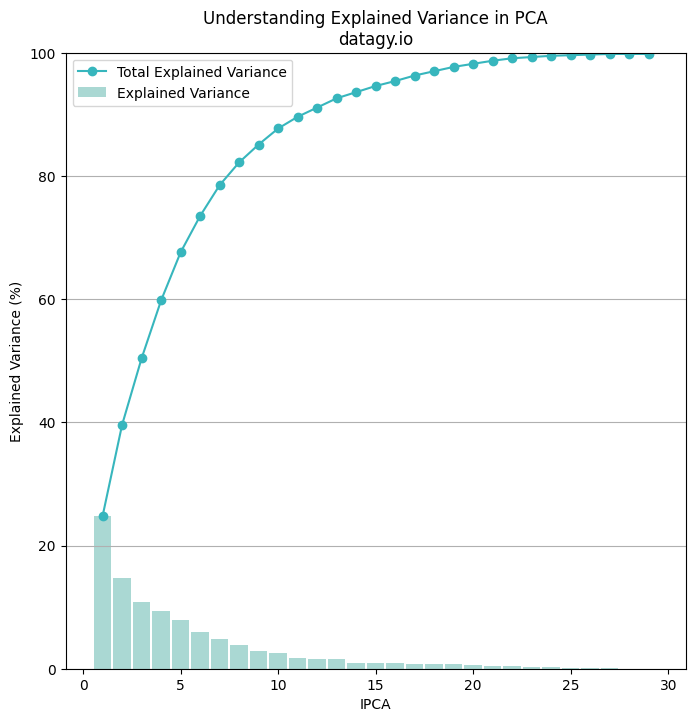

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=df_expl_var.index, height=df_expl_var['Explained Variance (%)'], label='Explained Variance', width=0.9, color='#AAD8D3')
ax.plot(df_expl_var['Total Explained Variance (%)'], label='Total Explained Variance', marker='o', c='#37B6BD')

plt.ylim(0, 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('IPCA')
plt.grid(True, axis='y')
plt.title('Understanding Explained Variance in PCA\ndatagy.io')
plt.legend()

In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Label'] = attacks.values

In [ ]:
new_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.860832 -0.403348 -5.338879  7.124293  4.507339 -1.599375  1.959340   
1      0.887492 -0.009400 -1.510635  4.408847  2.433052 -2.604349 -0.625242   
2      0.887492 -0.009400 -1.510635  4.408847  2.433052 -2.604349 -0.625242   
3      0.887492 -0.009400 -1.510635  4.408847  2.433052 -2.604349 -0.625242   
4      0.887492 -0.009400 -1.510635  4.408847  2.433052 -2.604349 -0.625242   
...         ...       ...       ...       ...       ...       ...       ...   
23981 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   
23982 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   
23983 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   
23984 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   
23985 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   

            PC8       PC9      PC10  ...      PC21      PC22      PC23  \
0     -0.444811 -0.280912  0.027845  ...  2.126295 -0.806743 -0.521830   
1     -0.416724  2.701512 -4.174293  ... -1.040351  0.823571  0.773136   
2     -0.416724  2.701512 -4.174293  ... -1.040351  0.823571  0.773136   
3     -0.416724  2.701512 -4.174293  ... -1.040351  0.823571  0.773136   
4     -0.416724  2.701512 -4.174293  ... -1.040351  0.823571  0.773136   
...         ...       ...       ...  ...       ...       ...       ...   
23981 -1.044857  1.065526 -1.730508  ...  0.707923 -0.494067 -0.598784   
23982 -1.044857  1.065526 -1.730508  ...  0.707923 -0.494067 -0.598784   
23983 -1.044857  1.065526 -1.730508  ...  0.707923 -0.494067 -0.598784   
23984 -1.044857  1.065526 -1.730508  ...  0.707923 -0.494067 -0.598784   
23985 -1.044857  1.065526 -1.730508  ...  0.707923 -0.494067 -0.598784   

           PC24      PC25      PC26      PC27      PC28      PC29       Label  
0      0.465137 -1.187619  1.400165 -0.075529 -1.142147 -0.375695  XMasAttack  
1     -0.906462 -0.475563  0.325874  0.078713 -0.751474 -1.088961  XMasAttack  
2     -0.906462 -0.475563  0.325874  0.078713 -0.751474 -1.088961  XMasAttack  
3     -0.906462 -0.475563  0.325874  0.078713 -0.751474 -1.088961  XMasAttack  
4     -0.906462 -0.475563  0.325874  0.078713 -0.751474 -1.088961  XMasAttack  
...         ...       ...       ...       ...       ...       ...         ...  
23981  0.008602 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign  
23982  0.008602 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign  
23983  0.008602 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign  
23984  0.008602 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign  
23985  0.008602 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign  

[23986 rows x 30 columns]

In [ ]:
# Machine Learning  Models
from sklearn.model_selection import cross_val_score

In [ ]:
new_data['BinLabel'] = aggregated_data['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

In [ ]:
new_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.860832 -0.403348 -5.338879  7.124293  4.507339 -1.599375  1.959340   
1      0.887492 -0.009400 -1.510635  4.408847  2.433052 -2.604349 -0.625242   
2      0.887492 -0.009400 -1.510635  4.408847  2.433052 -2.604349 -0.625242   
3      0.887492 -0.009400 -1.510635  4.408847  2.433052 -2.604349 -0.625242   
4      0.887492 -0.009400 -1.510635  4.408847  2.433052 -2.604349 -0.625242   
...         ...       ...       ...       ...       ...       ...       ...   
23981 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   
23982 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   
23983 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   
23984 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   
23985 -0.558367 -0.285939 -1.541895 -1.219523 -2.287734 -0.502753 -3.670037   

            PC8       PC9      PC10  ...      PC22      PC23      PC24  \
0     -0.444811 -0.280912  0.027845  ... -0.806743 -0.521830  0.465137   
1     -0.416724  2.701512 -4.174293  ...  0.823571  0.773136 -0.906462   
2     -0.416724  2.701512 -4.174293  ...  0.823571  0.773136 -0.906462   
3     -0.416724  2.701512 -4.174293  ...  0.823571  0.773136 -0.906462   
4     -0.416724  2.701512 -4.174293  ...  0.823571  0.773136 -0.906462   
...         ...       ...       ...  ...       ...       ...       ...   
23981 -1.044857  1.065526 -1.730508  ... -0.494067 -0.598784  0.008602   
23982 -1.044857  1.065526 -1.730508  ... -0.494067 -0.598784  0.008602   
23983 -1.044857  1.065526 -1.730508  ... -0.494067 -0.598784  0.008602   
23984 -1.044857  1.065526 -1.730508  ... -0.494067 -0.598784  0.008602   
23985 -1.044857  1.065526 -1.730508  ... -0.494067 -0.598784  0.008602   

           PC25      PC26      PC27      PC28      PC29       Label  BinLabel  
0     -1.187619  1.400165 -0.075529 -1.142147 -0.375695  XMasAttack         1  
1     -0.475563  0.325874  0.078713 -0.751474 -1.088961  XMasAttack         1  
2     -0.475563  0.325874  0.078713 -0.751474 -1.088961  XMasAttack         1  
3     -0.475563  0.325874  0.078713 -0.751474 -1.088961  XMasAttack         1  
4     -0.475563  0.325874  0.078713 -0.751474 -1.088961  XMasAttack         1  
...         ...       ...       ...       ...       ...         ...       ...  
23981 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign         0  
23982 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign         0  
23983 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign         0  
23984 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign         0  
23985 -0.168580 -0.121226 -0.002651 -0.093139 -0.011477      Benign         0  

[23986 rows x 31 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X_bin_class = new_data.drop(columns=['Label','BinLabel'], axis = 1)
y_bin_class = new_data['BinLabel']

X_train_bin_class, X_test_bin_class, y_train_bin_class, y_test_bin_class = train_test_split(X_bin_class, y_bin_class, test_size = 0.25, random_state = 0)


In [ ]:
# Logistic Regression (Binary Classification)
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bin_class, y_train_bin_class)

cv_lr1 = cross_val_score(lr1, X_train_bin_class, y_train_bin_class, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 1.0, 1.0, 0.999722067815453, 0.9983324068927182, 0.9991659716430359

Mean cross-validation score: 1.00


In [ ]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)


Logistic Regression Model 1 coefficients:
[-0.00761975 -0.04736953 -0.61167395  0.390873    0.11071356 -0.40678931
  0.11687347  0.04844245  0.61233606 -1.0362907  -0.66093946 -0.15424222
 -0.81019499 -0.28376469 -0.08946748 -0.1194933  -0.10713218 -0.31330597
 -0.10292174 -0.11146321 -0.25796812 -0.03767952 -0.77611513 -0.87658779
 -0.10025548  0.09598515  0.07537058 -0.10379345 -0.21197719]

Logistic Regression Model 1 intercept: -6.9624134355391245


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
y_pred = lr1.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5798    5]
 [   0  194]]


In [ ]:
# Precision, Recall, and F1-Score
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       0.97      1.00      0.99       194

    accuracy                           1.00      5997
   macro avg       0.99      1.00      0.99      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
new_data.to_csv('/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/aggregated_data.csv', index=False)

In [ ]:
import joblib
joblib.dump(lr1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/logisticregression_model1.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# save the scaler and pca
import joblib
joblib.dump(scaler,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/scaler.pkl')
joblib.dump(ipca,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/pca.pkl')

['/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/pca.pkl']

In [ ]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bin_class, y_train_bin_class)

cv_lr2 = cross_val_score(lr2, X_train_bin_class, y_train_bin_class, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 1.0, 1.0, 0.999722067815453, 0.9983324068927182, 0.9991659716430359

Mean cross-validation score: 1.00


In [ ]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)

Logistic Regression Model 2 coefficients:
[-0.03287193 -0.09036688 -0.84518631  0.35180069  0.15866786 -0.69867328
  0.33173545  0.10791104  0.74789319 -1.12533072 -0.5649541  -0.13847299
 -0.72357618 -0.20420101 -0.15838068  0.07534578 -0.13811963 -0.46111572
 -0.07748285 -0.14226876 -0.5752293  -0.15616689 -1.37522365 -1.54891975
 -0.20883775  0.1825674   0.17730188 -0.38988564 -0.43840905]

Logistic Regression Model 2 intercept: -8.673772795226231


In [ ]:
y_pred = lr2.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5798    5]
 [   0  194]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       0.97      1.00      0.99       194

    accuracy                           1.00      5997
   macro avg       0.99      1.00      0.99      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(lr2,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/logisticregression_model2.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Deep Learning model
# Build the binary classification model
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout

model = Sequential([
    Input(shape=(X_train_bin_class.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),  # Dropout layer for regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_bin_class, y_train_bin_class, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9501 - loss: 0.1619 - val_accuracy: 0.9989 - val_loss: 0.0054
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - loss: 0.0057 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9992 - val_loss: 0.0022
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9999 - loss: 8.9794e-04 - val_accuracy: 0.9997 - val_loss: 4.9105e-04
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9997 - val_loss: 5.7862e-04
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 7.4842e-04 - 

In [ ]:
loss, accuracy = model.evaluate(X_test_bin_class, y_test_bin_class)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9997 - loss: 0.0032
Test Loss: 0.0016292071668431163, Test Accuracy: 0.9998332262039185


In [ ]:
y_pred = (model.predict(X_test_bin_class) > 0.5).astype(int)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5802    1]
 [   0  194]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       0.99      1.00      1.00       194

    accuracy                           1.00      5997
   macro avg       1.00      1.00      1.00      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(model,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/deeplearning_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Support Vector Machine (Binary Classification)
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bin_class, y_train_bin_class)

cv_svm1 = cross_val_score(svm1, X_train_bin_class, y_train_bin_class, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Cross-validation scores: 1.0, 1.0, 1.0, 0.999722067815453, 0.9997219905476786

Mean cross-validation score: 1.00


In [ ]:
y_pred_svm = svm1.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5800    3]
 [   0  194]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       0.98      1.00      0.99       194

    accuracy                           1.00      5997
   macro avg       0.99      1.00      1.00      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(svm1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/svm_model1.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bin_class, y_train_bin_class)

cv_svm2 = cross_val_score(svm2, X_train_bin_class, y_train_bin_class, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 1.0, 0.9994441356309061, 0.9994441356309061, 0.999722067815453, 0.9991659716430359

Mean cross-validation score: 1.00


In [ ]:
y_pred_svm1 = svm2.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred_svm1)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5803    0]
 [   1  193]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred_svm1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       1.00      0.99      1.00       194

    accuracy                           1.00      5997
   macro avg       1.00      1.00      1.00      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -1.1723233907979052
SVM Model 2 intercept: -0.5851815229160489


In [ ]:
joblib.dump(svm2,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/svm_model2.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_bin_class, y_train_bin_class)

# Cross-validation
cv_dt = cross_val_score(dt, X_train_bin_class, y_train_bin_class, cv=5)
print('Decision Tree Classifier')
print(f'Cross-validation scores: {", ".join(map(str, cv_dt))}')
print(f'Mean cross-validation score: {cv_dt.mean():.2f}')

Decision Tree Classifier
Cross-validation scores: 0.999722067815453, 0.999722067815453, 1.0, 0.9991662034463591, 0.9991659716430359
Mean cross-validation score: 1.00


In [ ]:
y_pred_dt = dt.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred_dt)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5800    3]
 [   0  194]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       0.98      1.00      0.99       194

    accuracy                           1.00      5997
   macro avg       0.99      1.00      1.00      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(dt,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/decision_tree.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_bin_class, y_train_bin_class)

# Cross-validation
cv_rf = cross_val_score(rf, X_train_bin_class, y_train_bin_class, cv=5)
print('Random Forest Classifier')
print(f'Cross-validation scores: {", ".join(map(str, cv_rf))}')
print(f'Mean cross-validation score: {cv_rf.mean():.2f}')

Random Forest Classifier
Cross-validation scores: 1.0, 1.0, 1.0, 1.0, 1.0
Mean cross-validation score: 1.00


In [ ]:
y_pred_rf = rf.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5802    1]
 [   0  194]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       0.99      1.00      1.00       194

    accuracy                           1.00      5997
   macro avg       1.00      1.00      1.00      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(rf,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/random_forest.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bin_class, y_train_bin_class)

cv_knn = cross_val_score(knn, X_train_bin_class, y_train_bin_class, cv=5)
print('K-Nearest Neighbors Classifier')
print(f'Cross-validation scores: {", ".join(map(str, cv_knn))}')
print(f'Mean cross-validation score: {cv_knn.mean():.2f}')

K-Nearest Neighbors Classifier
Cross-validation scores: 0.9994441356309061, 1.0, 1.0, 0.999722067815453, 0.9991659716430359
Mean cross-validation score: 1.00


In [ ]:
y_pred_knn = knn.predict(X_test_bin_class)

In [ ]:
conf_matrix = confusion_matrix(y_test_bin_class, y_pred_knn)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5800    3]
 [   0  194]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test_bin_class, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       0.98      1.00      0.99       194

    accuracy                           1.00      5997
   macro avg       0.99      1.00      1.00      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(knn,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/binary_models/knearest_neighbor.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Multi-Classification

In [ ]:
features = new_data.drop(columns=['Label', 'BinLabel'], axis = 1)
labels = new_data['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes = len(y_train.unique())

In [ ]:
multi_model = Sequential()
multi_model.add(Input(shape=(X_train.shape[1],)))
multi_model.add(Dense(128, activation='relu'))
multi_model.add(Dropout(0.5))  # Dropout to prevent overfitting
multi_model.add(Dense(64, activation='relu'))
multi_model.add(Dropout(0.5))  # Dropout to prevent overfitting

multi_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
multi_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
multi_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,421 (48.52 KB)

 Trainable params: 12,421 (48.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the string labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the integer labels
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

In [ ]:
history = multi_model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_data=(X_test, y_test_cat))

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9441 - loss: 0.2192 - val_accuracy: 0.9927 - val_loss: 0.0155
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0246 - val_accuracy: 0.9897 - val_loss: 0.0143
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9900 - loss: 0.0191 - val_accuracy: 0.9928 - val_loss: 0.0137
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9919 - loss: 0.0168 - val_accuracy: 0.9928 - val_loss: 0.0138
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9915 - loss: 0.0170 - val_accuracy: 0.9928 - val_loss: 0.0126
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9928 - loss: 0.0137 - val_accuracy: 0.9928 - val_loss: 0.0128
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9922 - loss: 0.0137 - val_accuracy: 0.9928 - val_loss: 0.0139
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9933 - loss: 0.0129 - 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9942 - loss: 0.0160
Test Loss: 0.012172055430710316, Test Accuracy: 0.9951642751693726


In [ ]:
y_pred_prob = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5802    0    0    0    1]
 [   0   17   23    0    0]
 [   0    5   54    0    0]
 [   0    0    0   63    0]
 [   0    0    0    0   32]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, zero_division=1))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5803
           1       0.77      0.42      0.55        40
           2       0.70      0.92      0.79        59
           3       1.00      1.00      1.00        63
           4       0.97      1.00      0.98        32

    accuracy                           1.00      5997
   macro avg       0.89      0.87      0.87      5997
weighted avg       1.00      1.00      0.99      5997



In [ ]:
joblib.dump(multi_model,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/multiclass_deeplearning.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.9961089494163424, 0.9961089494163424, 0.9972206781545303, 0.9974986103390773, 0.9958298582151793

Mean cross-validation score: 1.00


In [ ]:
y_pred_rfc = rf1.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5800    1    2    0    0]
 [   0   24   16    0    0]
 [   0    1   58    0    0]
 [   1    0    0   62    0]
 [   0    0    0    0   32]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5803
  HTTPAttack       0.92      0.60      0.73        40
   TCPAttack       0.76      0.98      0.86        59
   UDPAttack       1.00      0.98      0.99        63
  XMasAttack       1.00      1.00      1.00        32

    accuracy                           1.00      5997
   macro avg       0.94      0.91      0.92      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(rf1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/rf1_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9983324068927182, 0.9983324068927182, 0.9977765425236242, 0.9974986103390773, 0.9974979149291076

Mean cross-validation score: 1.00


In [ ]:
y_pred_rfc1 = rf2.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rfc1)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5803    0    0    0    0]
 [   0   28   12    0    0]
 [   0    2   57    0    0]
 [   1    0    0   62    0]
 [   0    0    0    0   32]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rfc1))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5803
  HTTPAttack       0.93      0.70      0.80        40
   TCPAttack       0.83      0.97      0.89        59
   UDPAttack       1.00      0.98      0.99        63
  XMasAttack       1.00      1.00      1.00        32

    accuracy                           1.00      5997
   macro avg       0.95      0.93      0.94      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(rf2,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/rf2_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

Decision Tree Model 1

Cross-validation scores: 0.9947192884936076, 0.9927737632017788, 0.9947192884936076, 0.9952751528627015, 0.994161801501251

Mean cross-validation score: 0.99


In [ ]:
y_pred_dt1 = dt1.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt1)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5802    0    1    0    0]
 [   0   28   12    0    0]
 [   0    7   52    0    0]
 [   1    0    0   62    0]
 [   2    0    0    0   30]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt1))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5803
  HTTPAttack       0.80      0.70      0.75        40
   TCPAttack       0.80      0.88      0.84        59
   UDPAttack       1.00      0.98      0.99        63
  XMasAttack       1.00      0.94      0.97        32

    accuracy                           1.00      5997
   macro avg       0.92      0.90      0.91      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(dt1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/dt1_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 8)
dt2.fit(X_train, y_train)

cv_dt2 = cross_val_score(dt2, X_train, y_train, cv = 5)
print('Decision Tree Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt2)))
print(f'\nMean cross-validation score: {cv_dt2.mean():.2f}')

Decision Tree Model 2

Cross-validation scores: 0.9961089494163424, 0.9961089494163424, 0.9963868816008894, 0.9963868816008894, 0.9972199054767862

Mean cross-validation score: 1.00


In [ ]:
y_pred_dt2 = dt2.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt2)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5802    0    1    0    0]
 [   0   32    8    0    0]
 [   0    5   54    0    0]
 [   1    0    0   62    0]
 [   0    0    0    0   32]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt2))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5803
  HTTPAttack       0.86      0.80      0.83        40
   TCPAttack       0.86      0.92      0.89        59
   UDPAttack       1.00      0.98      0.99        63
  XMasAttack       1.00      1.00      1.00        32

    accuracy                           1.00      5997
   macro avg       0.94      0.94      0.94      5997
weighted avg       1.00      1.00      1.00      5997



In [ ]:
joblib.dump(dt2,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/dt2_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9902723735408561, 0.9927737632017788, 0.9927737632017788, 0.9913841022790439, 0.9924937447873228

Mean cross-validation score: 0.99


In [ ]:
y_pred_knn1 = knn1.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn1)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5800    0    0    0    3]
 [   0   19   21    0    0]
 [   0   12   47    0    0]
 [   0    0    0   63    0]
 [   0    0    1    0   31]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn1))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5803
  HTTPAttack       0.61      0.47      0.54        40
   TCPAttack       0.68      0.80      0.73        59
   UDPAttack       1.00      1.00      1.00        63
  XMasAttack       0.91      0.97      0.94        32

    accuracy                           0.99      5997
   macro avg       0.84      0.85      0.84      5997
weighted avg       0.99      0.99      0.99      5997



In [ ]:
joblib.dump(knn1,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/knn1_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 8)
knn2.fit(X_train, y_train)

cv_knn2 = cross_val_score(knn2, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn2)))
print(f'\nMean cross-validation score: {cv_knn2.mean():.2f}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9933296275708727, 0.9952751528627015, 0.9927737632017788, 0.9944413563090606, 0.9933277731442869

Mean cross-validation score: 0.99


In [ ]:
y_pred_knn2 = knn2.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn2)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[5800    0    0    0    3]
 [   2   20   18    0    0]
 [   1   10   48    0    0]
 [   0    0    0   63    0]
 [   0    0    0    0   32]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn2))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5803
  HTTPAttack       0.67      0.50      0.57        40
   TCPAttack       0.73      0.81      0.77        59
   UDPAttack       1.00      1.00      1.00        63
  XMasAttack       0.91      1.00      0.96        32

    accuracy                           0.99      5997
   macro avg       0.86      0.86      0.86      5997
weighted avg       0.99      0.99      0.99      5997



In [ ]:
joblib.dump(knn2,'/content/drive/MyDrive/Labelled_Multiclass_Dataset/multi_class_models/knn2_model.pkl')
print("Model saved successfully.")

Model saved successfully.
